In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
countries = pd.read_csv('datasets/cluster_analysis.csv')

In [3]:
countries.head()

Country code  Life Expectancy  Cigarette consumption  Alcohol consumption  \
0          SSD           58.095                    NaN                  NaN   
1          SYR           73.651                   25.9                 0.19   
2          DMA              NaN                   11.6                 7.23   
3          FSM           68.002                    NaN                 2.51   
4          PRK           72.453                   14.9                 4.16   

   Incidence of tuberculosis per 100000 per year  \
0                                          232.0   
1                                           19.0   
2                                           47.0   
3                                           75.0   
4                                          523.0   

   GDP per Capita (Current US$)  Income Gini Coefficient  \
0                           NaN                    0.441   
1                           NaN                      NaN   
2                   7559.975039                      NaN   
3                   3476.650895                      NaN   
4                           NaN                      NaN   

   Current health expenditure per capita (current US$)  Total Population  \
0                                           22.63819          11381377.0   
1                                                NaN          18275704.0   
2                                          440.16986             72172.0   
3                                          415.19827            116255.0   
4                                                NaN          25887045.0   

   Population Density, Number of People/km2  ...  \
0                                     18.01  ...   
1                                     99.52  ...   
2                                     96.23  ...   
3                                    166.08  ...   
4                                    214.99  ...   

   People using safely managed drinking water services, urban (% of urban population)  \
0                                                NaN                                    
1                                                NaN                                    
2                                                NaN                                    
3                                                NaN                                    
4                                              76.96                                    

   EPI score  cardiovascular-disease-death-rates  \
0        NaN                          231.546557   
1        NaN                          491.127714   
2       51.2                          267.111202   
3       37.4                          560.229290   
4        NaN                          352.910430   

   Diabetes prevalence (% of population ages 20 to 79)  \
0                                                6.5     
1                                               14.9     
2                                               11.7     
3                                               15.6     
4                                                8.6     

   Acute lower respiratory infections  asthma-prevalence  Democracy Index  \
0                                19.0           4.048206              NaN   
1                                 1.8           3.444039             1.43   
2                                 1.4           7.177538              NaN   
3                                 4.9           3.265197              NaN   
4                                 2.9           3.914215             1.08   

   Human Development Index, 2019  Corruption Perceptions Index 2021  \
0                          0.433                               11.0   
1                          0.567                               13.0   
2                          0.742                               55.0   
3                          0.620                                NaN   
4                            NaN                               16.0 

In [27]:
countries.describe().transpose()

count          mean  \
Life Expectancy                                     185.0  7.249514e+01   
Cigarette consumption                               184.0  1.855543e+01   
Alcohol consumption                                 182.0  5.848791e+00   
Incidence of tuberculosis per 100000 per year       186.0  1.051435e+02   
GDP per Capita (Current US$)                        175.0  1.532365e+04   
Income Gini Coefficient                             117.0  3.595299e-01   
Current health expenditure per capita (current ...  180.0  1.119220e+03   
Total Population                                    185.0  4.214488e+07   
Population Density, Number of People/km2            186.0  2.007005e+02   
Ambient Air Pollution, Concentration of Fine Pa...  186.0  2.773188e+01   
Ambient and Household Air Pollution Attributabl...  185.0  8.819514e+00   
People using safely managed sanitation services...  118.0  5.859424e+01   
People using safely managed drinking water serv...  114.0  7.844974e+01   
EPI score                                           180.0  4.335778e+01   
cardiovascular-disease-death-rates                  186.0  2.924238e+02   
Diabetes prevalence (% of population ages 20 to...  186.0  8.393548e+00   
Acute lower respiratory infections                  185.0  4.051351e+00   
asthma-prevalence                                   184.0  4.313587e+00   
Democracy Index                                     165.0  5.278242e+00   
Human Development Index, 2019                       184.0  7.204457e-01   
Corruption Perceptions Index 2021                   179.0  4.309497e+01   
UHC service coverage index                          186.0  6.453763e+01   

                                                             std  \
Life Expectancy                                     7.247308e+00   
Cigarette consumption                               1.210657e+01   
Alcohol consumption                                 4.052298e+00   
Incidence of tuberculosis per 100000 per year       1.385734e+02   
GDP per Capita (Current US$)                        2.199908e+04   
Income Gini Coefficient                             7.555879e-02   
Current health expenditure per capita (current ...  1.853743e+03   
Total Population                                    1.506183e+08   
Population Density, Number of People/km2            6.168959e+02   
Ambient Air Pollution, Concentration of Fine Pa...  1.889875e+01   
Ambient and Household Air Pollution Attributabl...  2.483644e+01   
People using safely managed sanitation services...  2.937032e+01   
People using safely managed drinking water serv...  2.509380e+01   
EPI score                                           1.247957e+01   
cardiovascular-disease-death-rates                  1.410693e+02   
Diabetes prevalence (% of population ages 20 to...  4.736821e+00   
Acute lower respiratory infections                  5.089825e+00   
asthma-prevalence                                   1.866496e+00   
Democracy Index                                     2.313894e+00   
Human Development Index, 2019                       1.505659e-01   
Corruption Perceptions Index 2021                   1.861698e+01   
UHC service coverage index                          1.552926e+01   

                                                             min  \
Life Expectancy                                        53.679000   
Cigarette consumption                                   1.000000   
Alcohol consumption                                     0.000000   
Incidence of tuberculosis per 100000 per year           0.790000   
GDP per Capita (Current US$)                          236.795414   
Income Gini Coefficient                                 0.232000   
Current health expenditure per capita (current ...     19.849980   
Total Population                                    72172.000000   
Population Density, Number of People/km2                2.140000   
Ambient Air Pollution, Concentration of Fine Pa...      5.860000   
Ambient and H

In [20]:
countries.columns

Index(['Country code', 'Life Expectancy', 'Cigarette consumption',
       'Alcohol consumption', 'Incidence of tuberculosis per 100000 per year',
       'GDP per Capita (Current US$)', 'Income Gini Coefficient',
       'Current health expenditure per capita (current US$)',
       'Total Population', 'Population Density, Number of People/km2',
       'Ambient Air Pollution, Concentration of Fine Particulate Matter PM2.5 (Ug/M3)',
       'Ambient and Household Air Pollution Attributable Death Rate (per 100 000 Population)',
       'People using safely managed sanitation services (% of population)',
       'People using safely managed drinking water services, urban (% of urban population)',
       'EPI score', 'cardiovascular-disease-death-rates',
       'Diabetes prevalence (% of population ages 20 to 79)',
       'Acute lower respiratory infections', 'asthma-prevalence',
       'Democracy Index', 'Human Development Index, 2019',
       'Corruption Perceptions Index 2021', 'UHC service c

In [4]:
from sklearn.impute import KNNImputer
from numpy import isnan
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = countries.select_dtypes(include=numerics).columns
# split into input and output elements
X = countries[num].values
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))
total_df = pd.DataFrame()
total_df = total_df.append(pd.DataFrame(Xtrans, columns = num), ignore_index = True)

Missing: 274
Missing: 0


C:\Users\Tetiana Matviichuk\AppData\Local\Temp\ipykernel_12184\3274904186.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_df = total_df.append(pd.DataFrame(Xtrans, columns = num), ignore_index = True)


In [23]:
total_df.to_csv('datasets/completed_countries.csv')

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_sc = pd.DataFrame(scaler.fit_transform(total_df), columns = countries.select_dtypes(include=numerics).columns)

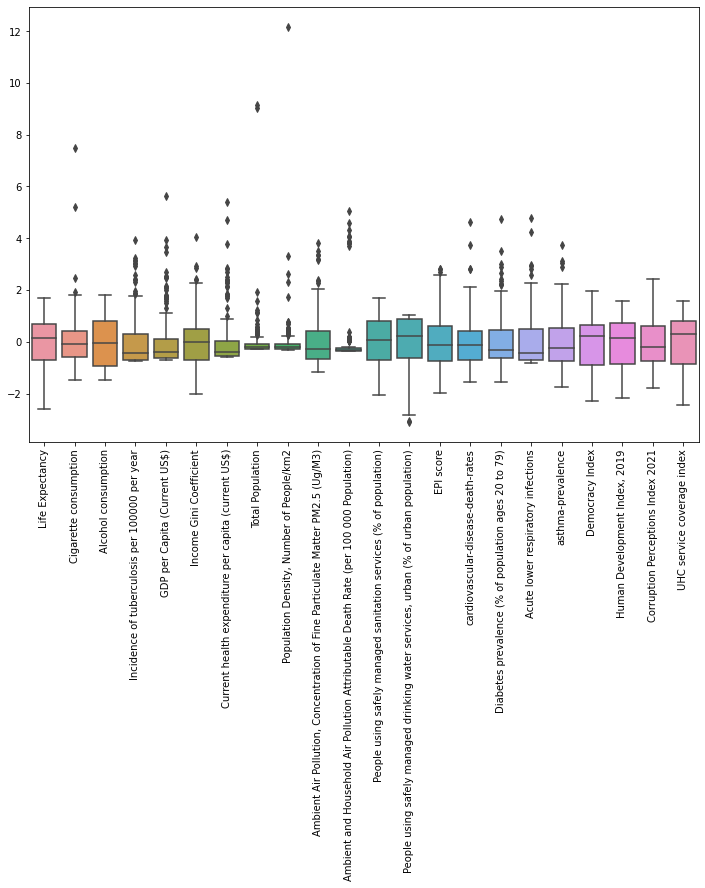

In [63]:
fig = plt.figure(figsize = (12,8))
ax = sns.boxplot(data=data_sc)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

<AxesSubplot:>

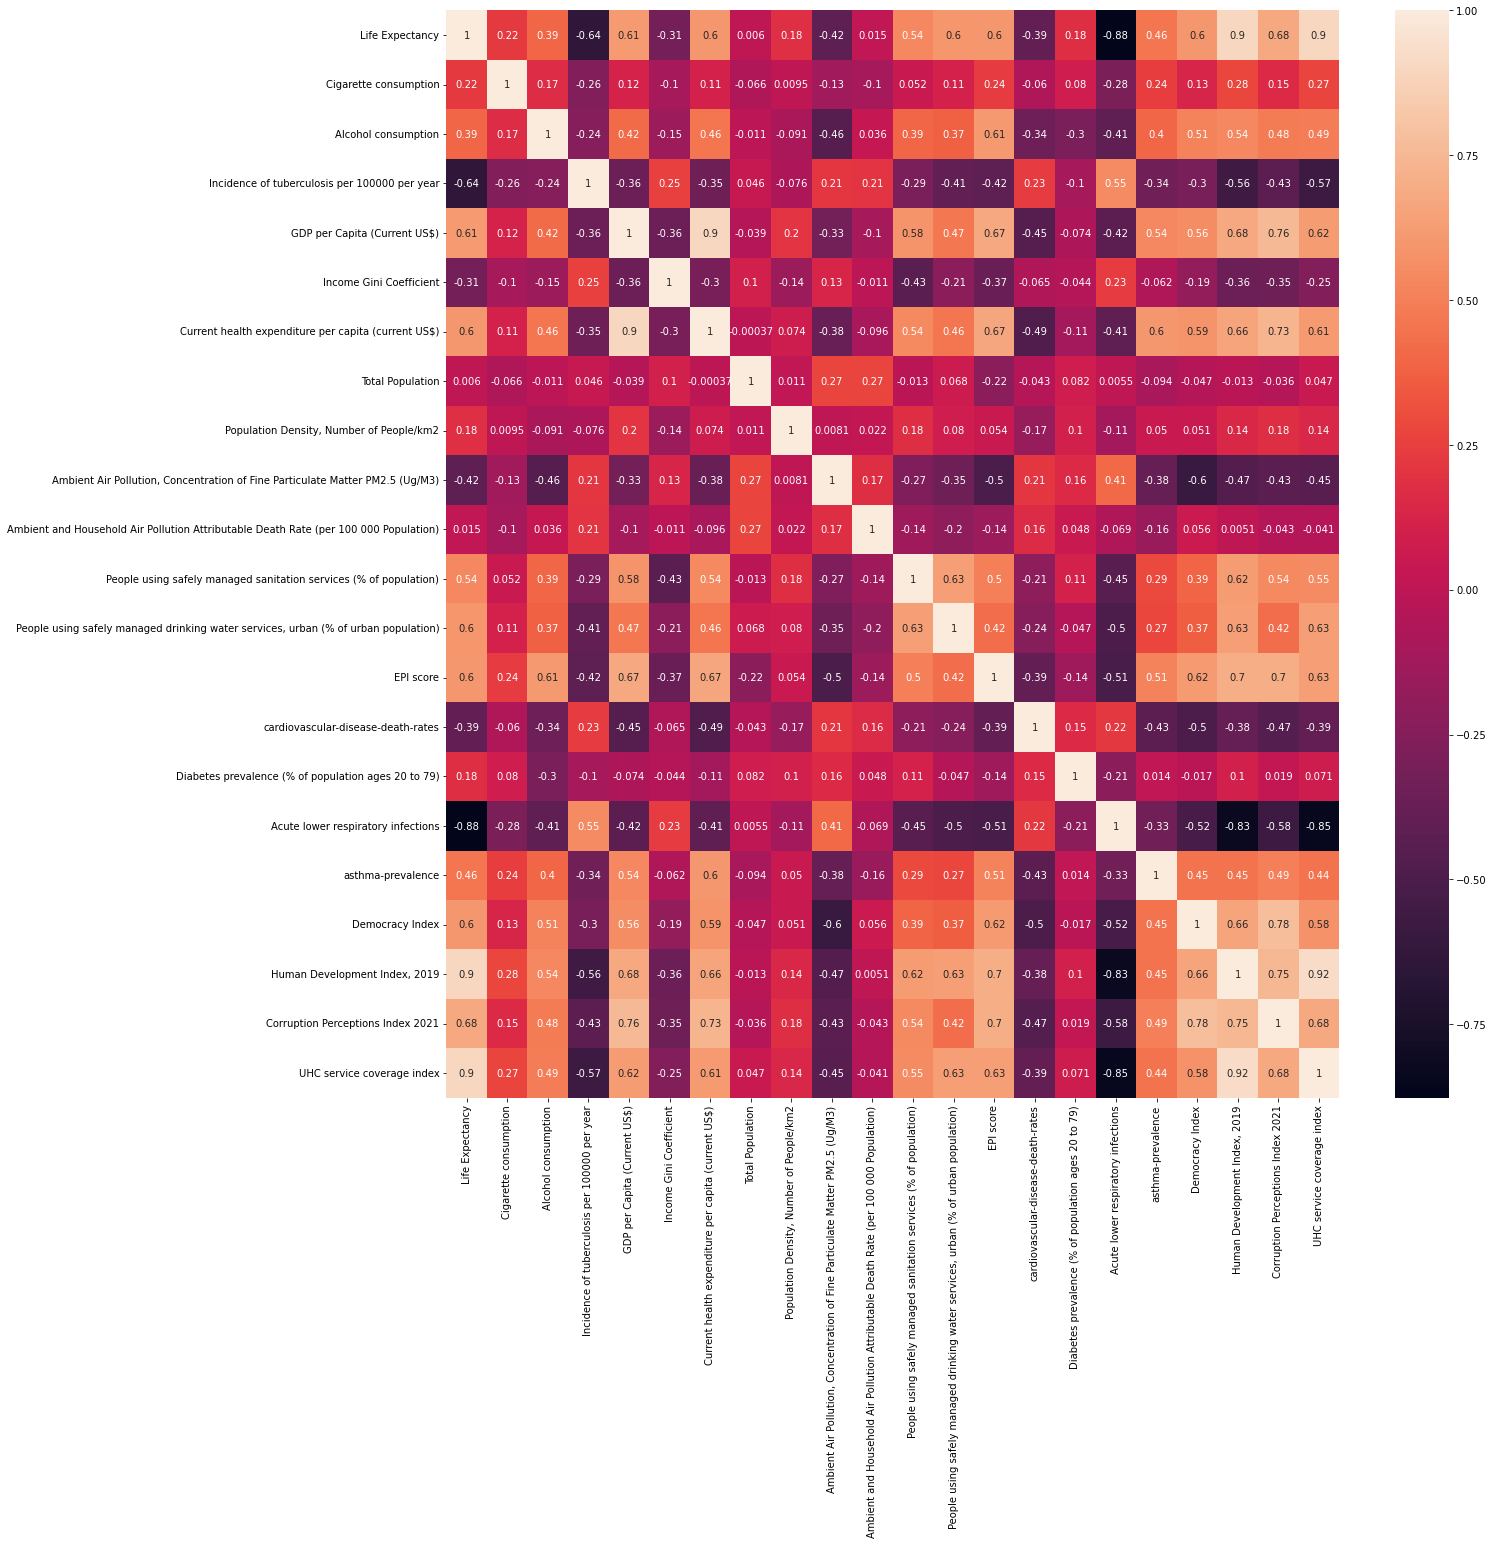

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

corr2 = data_sc.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr2, annot = True)

<AxesSubplot:xlabel='UHC service coverage index', ylabel='Density'>

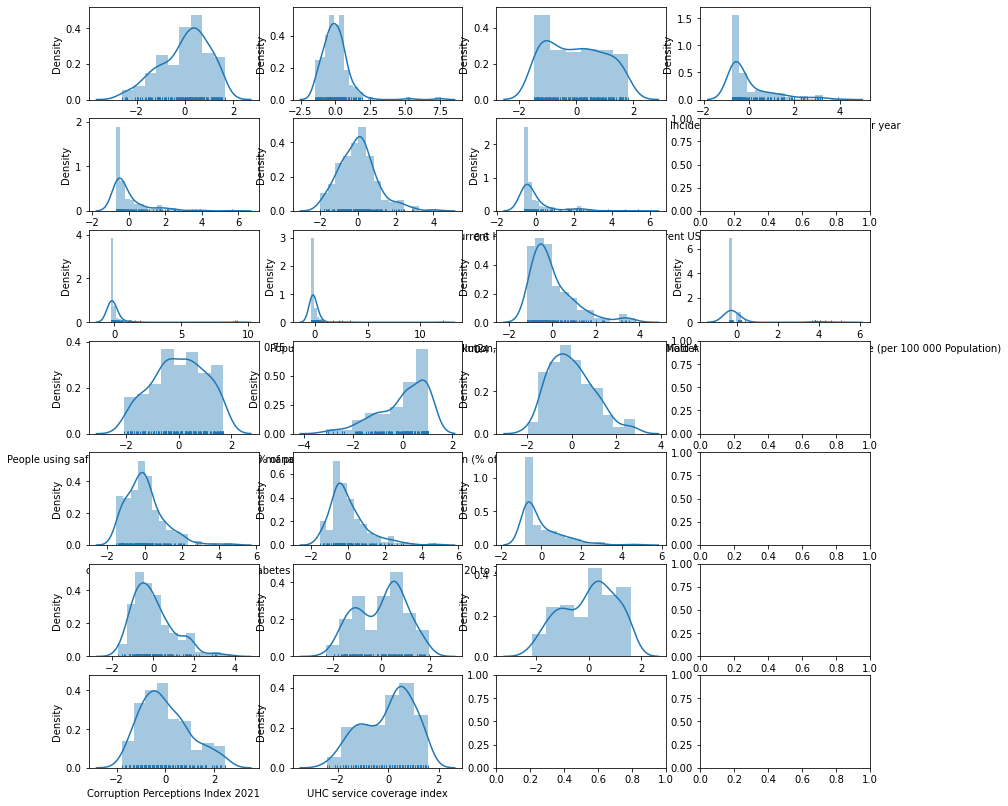

In [10]:
# Histograms

df = data_sc.copy()
%matplotlib inline
# Univariate Histograms
f, axes = plt.subplots(7,4, figsize=(14, 14))
sns.distplot(df["Life Expectancy"], rug=True, ax=axes[0, 0])
sns.distplot(df["Cigarette consumption"], rug=True, ax=axes[0, 1])
sns.distplot(df["Alcohol consumption"], rug=True, ax=axes[0, 2])
sns.distplot(df["Incidence of tuberculosis per 100000 per year"], rug=True, ax=axes[0, 3])
sns.distplot(df["GDP per Capita (Current US$)"], rug=True, ax=axes[1, 0])
sns.distplot(df["Income Gini Coefficient"], rug=True, ax=axes[1, 1])
sns.distplot(df["Current health expenditure per capita (current US$)"], rug=True, ax=axes[1, 2])
sns.distplot(df["Total Population"], rug=True, ax=axes[2, 0])
sns.distplot(df["Population Density, Number of People/km2"], rug=True, ax=axes[2, 1])
sns.distplot(df["Ambient Air Pollution, Concentration of Fine Particulate Matter PM2.5 (Ug/M3)"], rug=True, ax=axes[2, 2])
sns.distplot(df["Ambient and Household Air Pollution Attributable Death Rate (per 100 000 Population)"], rug=True, ax=axes[2, 3])
sns.distplot(df["People using safely managed sanitation services (% of population)"], rug=True, ax=axes[3, 0])
sns.distplot(df["People using safely managed drinking water services, urban (% of urban population)"], rug=True, ax=axes[3, 1])
sns.distplot(df["EPI score"], ax=axes[3, 2])
sns.distplot(df["cardiovascular-disease-death-rates"], rug=True, ax=axes[4, 0])
sns.distplot(df["Diabetes prevalence (% of population ages 20 to 79)"], rug=True, ax=axes[4, 1])
sns.distplot(df["Acute lower respiratory infections"], ax=axes[4, 2])
sns.distplot(df["asthma-prevalence"], rug=True, ax=axes[5, 0])
sns.distplot(df["Democracy Index"], rug=True, ax=axes[5, 1])
sns.distplot(df["Human Development Index, 2019"], ax=axes[5, 2])
sns.distplot(df["Corruption Perceptions Index 2021"], rug=True, ax=axes[6, 0])
sns.distplot(df["UHC service coverage index"], rug=True, ax=axes[6, 1])

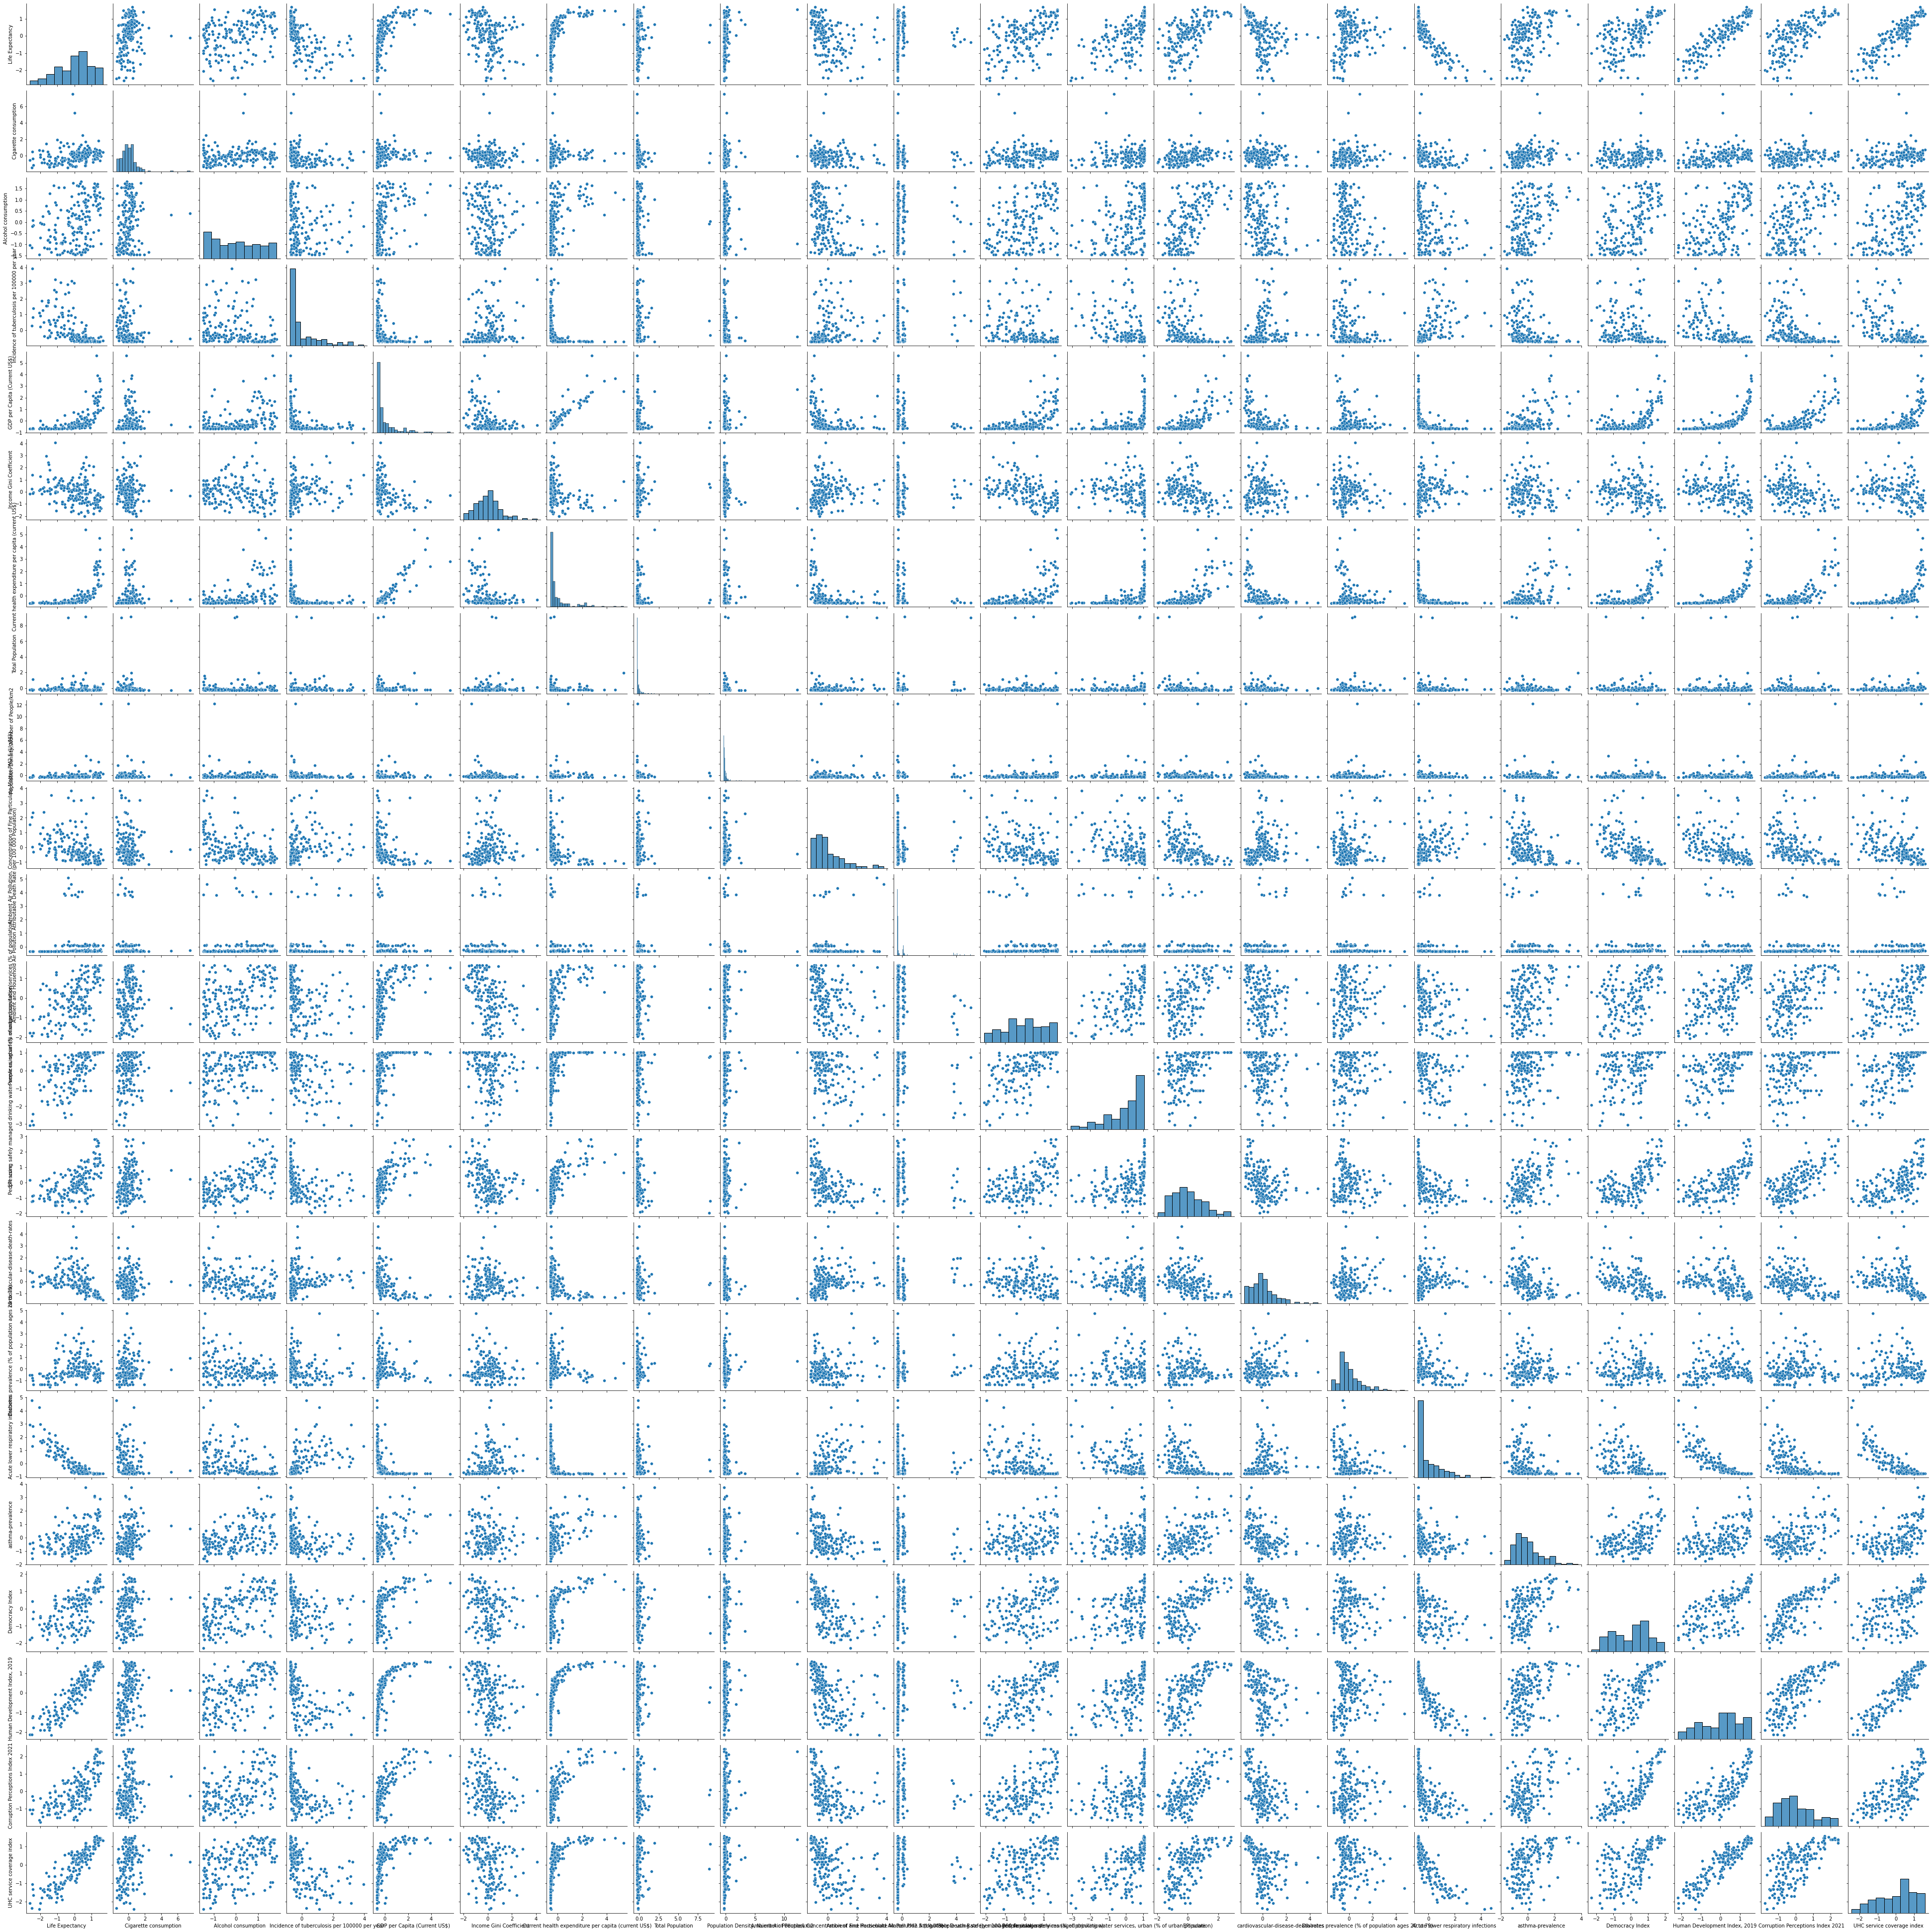

In [11]:
sns.pairplot(df)

### Conducting PCA and defining number of components

In [12]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver='randomized', random_state=42)

# fiting PCA on the dataset
pca.fit(df)

PCA(random_state=42, svd_solver='randomized')

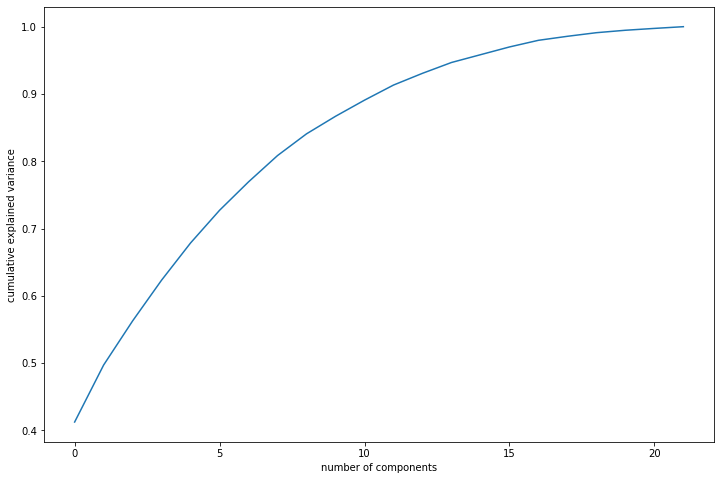

In [13]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [14]:
colnames = list(df.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                      'PC4':pca.components_[3],'PC5':pca.components_[4],'PC6':pca.components_[5],'PC7':pca.components_[6],
                       'PC8':pca.components_[7],'PC9':pca.components_[8],'PC10':pca.components_[9],'PC11':pca.components_[10],
                       'PC12':pca.components_[11],'PC13':pca.components_[12],'PC14':pca.components_[13],'PC15':pca.components_[14]})
pcs_df

Feature       PC1       PC2  \
0                                     Life Expectancy  0.291532  0.240838   
1                               Cigarette consumption  0.089746  0.090756   
2                                 Alcohol consumption  0.205158 -0.251283   
3       Incidence of tuberculosis per 100000 per year -0.196024 -0.195322   
4                        GDP per Capita (Current US$)  0.267327 -0.111200   
5                             Income Gini Coefficient -0.126972 -0.148163   
6   Current health expenditure per capita (current...  0.266575 -0.170862   
7                                    Total Population -0.021362  0.247222   
8            Population Density, Number of People/km2  0.052669  0.184841   
9   Ambient Air Pollution, Concentration of Fine P... -0.188638  0.245814   
10  Ambient and Household Air Pollution Attributab... -0.035884  0.215546   
11  People using safely managed sanitation service...  0.223190  0.108138   
12  People using safely managed drinking water ser...  0.217875  0.094204   
13                                          EPI score  0.268867 -0.185003   
14                 cardiovascular-disease-death-rates -0.169319  0.246392   
15  Diabetes prevalence (% of population ages 20 t...  0.000879  0.496981   
16                 Acute lower respiratory infections -0.254439 -0.298089   
17                                  asthma-prevalence  0.202481 -0.197442   
18                                    Democracy Index  0.250637 -0.137680   
19                      Human Development Index, 2019  0.307451  0.158633   
20                  Corruption Perceptions Index 2021  0.282623 -0.048393   
21                         UHC service coverage index  0.294089  0.173175   

         PC3       PC4       PC5       PC6       PC7       PC8       PC9  \
0  -0.014284 -0.101893  0.046384 -0.006277 -0.116902  0.019251 -0.172244   
1  -0.346256 -0.278259  0.142001  0.157342  0.586880  0.323606  0.404700   
2   0.106926 -0.237463 -0.260973 -0.102626  0.095428  0.157970  0.151679   
3   0.263370  0.072663 -0.163178  0.157954 -0.109256 -0.087985  0.562418   
4   0.153616  0.285133  0.075223  0.044654  0.178131 -0.107004 -0.034290   
5   0.102870 -0.433698  0.427935 -0.184526 -0.301027 -0.056906  0.156048   
6   0.172647  0.187941  0.076076  0.000378  0.205696 -0.195432 -0.044249   
7   0.546907 -0.139762  0.117578 -0.360853  0.258749  0.009388  0.167595   
8   0.117580  0.402824  0.294387  0.290696 -0.270790  0.628306  0.194053   
9   0.199825  0.187254  0.188482 -0.117729  0.391128 -0.004968 -0.261255   
10  0.513394 -0.256640 -0.326917  0.373312  0.071759  0.086880 -0.069195   
11  0.013413  0.349723 -0.181670 -0.231875 -0.032891 -0.111343  0.342917   
12 -0.045009  0.082658 -0.086506 -0.526550 -0.145313  0.076840  0.231823   
13 -0.083208  0.036703 -0.118486  0.116979  0.111524  0.017296 -0.057189   
14 -0.225762  0.025362 -0.472593  0.030516  0.083506 -0.122291  0.131773   
15 -0.110271  0.024281  0.229786  0.251372 -0.085456 -0.534225  0.269700   
16  0.079717  0.258766  0.062854 -0.025689  0.153505 -0.054421  0.078179   
17 -0.038726 -0.068327  0.323780  0.129955  0.199215 -0.225024  0.137300   
18  0.150427 -0.158515 -0.029544  0.246582 -0.195646 -0.125370  0.066153   
19 -0.000820 -0.081311 -0.067555 -0.012736 -0.040181  0.035189 -0.018232   
20  0.126170  0.083370  0.020352  0.190731  0.005166 -0.104703 -0.056749   
21 -0.004827 -0.145050  0.013433 -0.109646 -0.075597  0.080207 -0.057958   

        PC10      PC11      PC12      PC13      PC14      PC15  
0  -0.088554  0.004769 -0.078690 -0.099593  0.181914  0.030173  
1   0.125713  0.155340 -0.227699 -0.079488 -0.122102  0.082396  
2  -0.066615  0.095752  0.611875  0.244794 -0.015096  0.155274  
3  -0.057480  0.279409 -0.225486 -0.013680  0.485150 -0.143448  
4  -0.166574  0.026154 -0.292473  0.184681 -0.025207  0.092363  
5  -0.343833  0.181851 -0.144045  0.352899 -0.301019  0.026065  
6  -0.155259 -0.060275 -0.279105  0.077104  0.017686  0.159421  
7   0

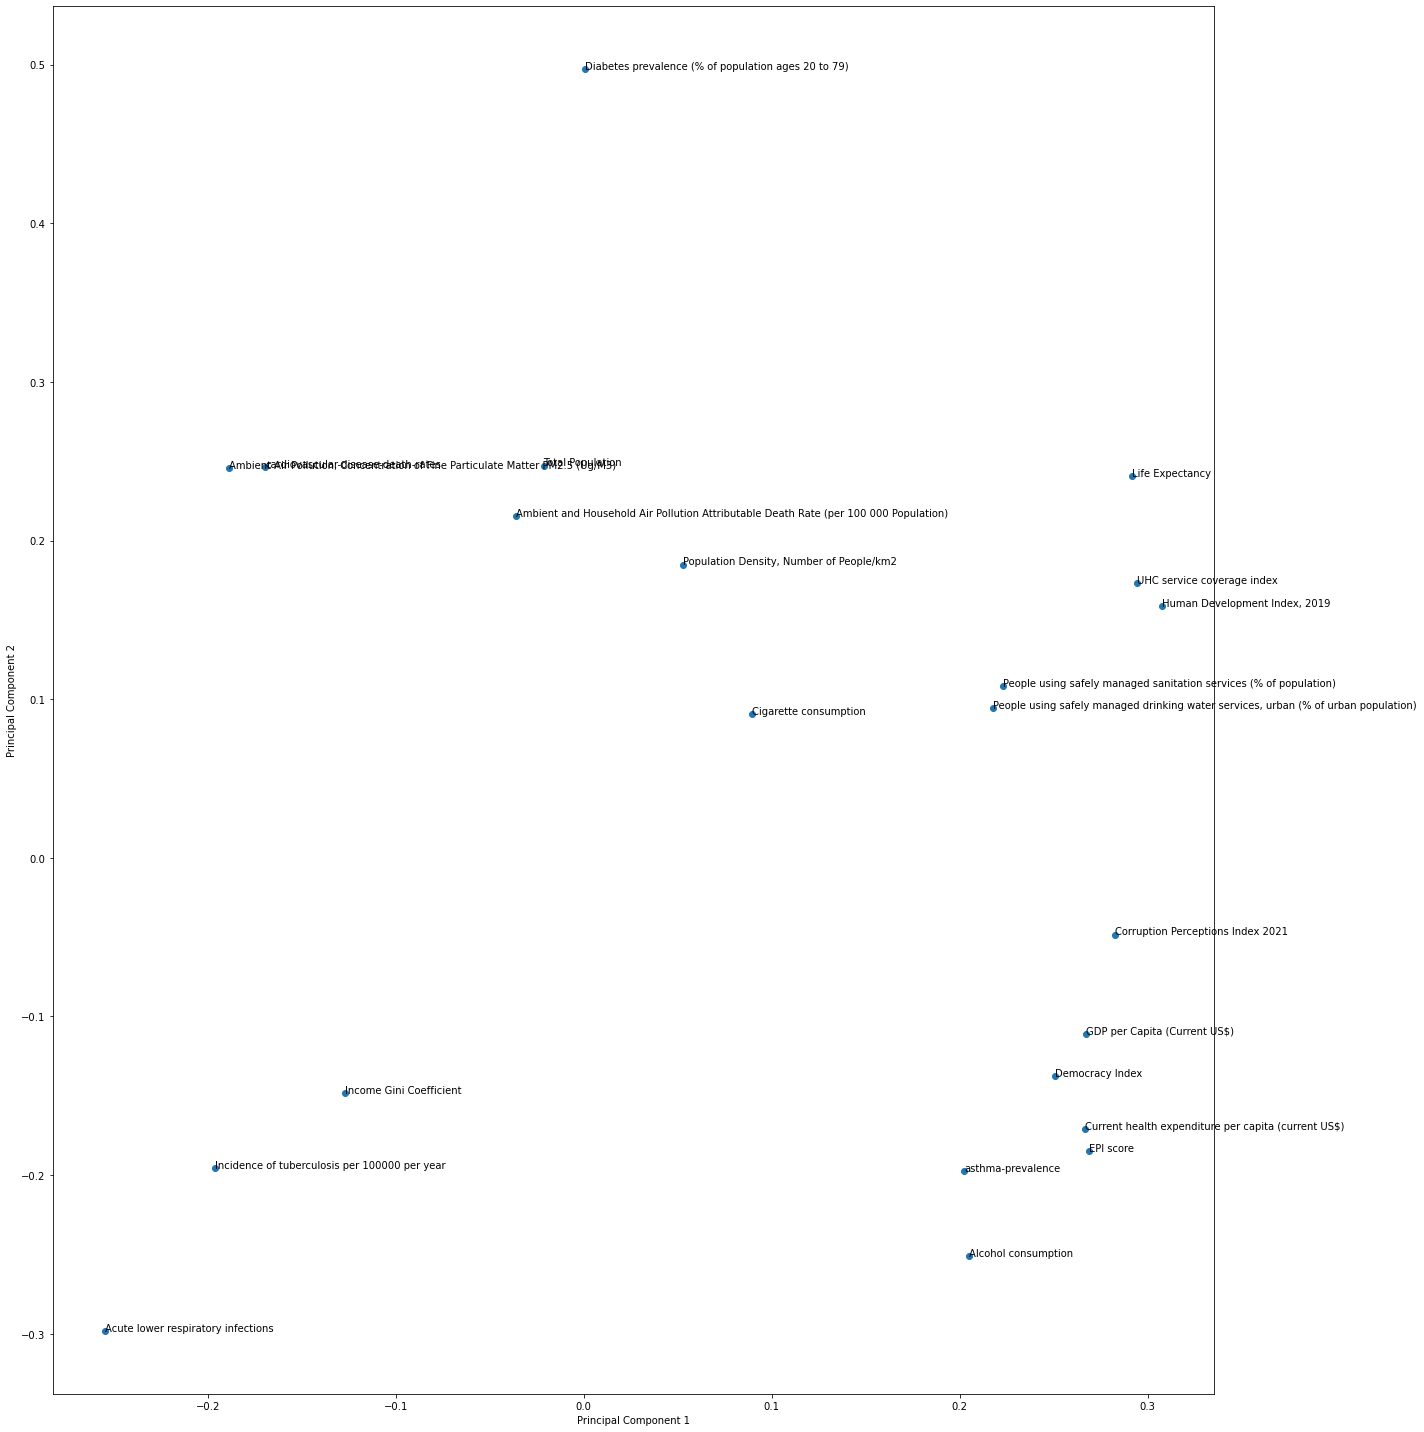

In [15]:
%matplotlib inline
fig = plt.figure(figsize = (20,20))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

### final PCA using methoda above

In [16]:
#Finally let's go ahead and do dimenstionality reduction using the four Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=15)
df_pca = pca_final.fit_transform(df)
df_pca.shape

(186, 15)

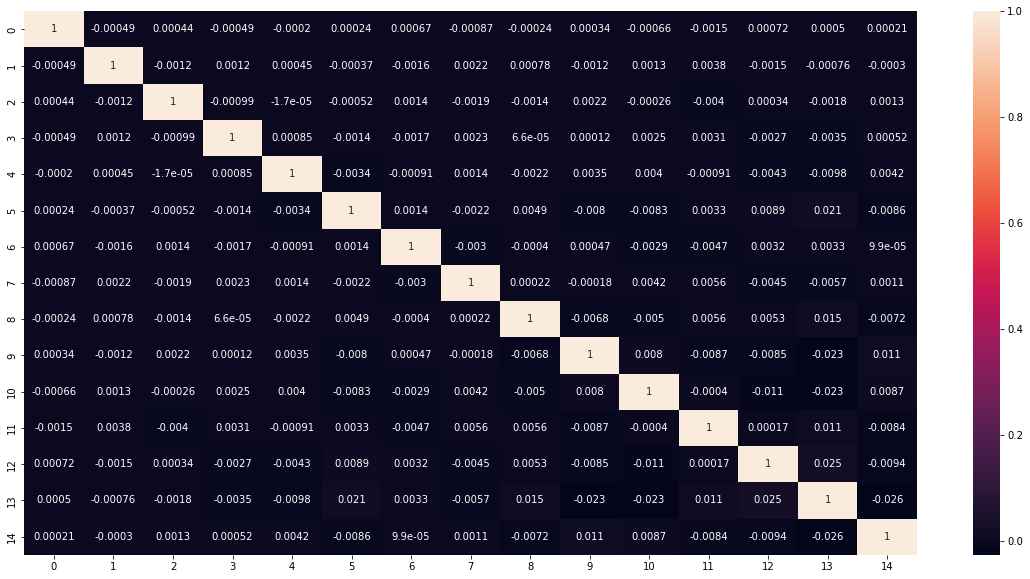

In [17]:
pc = np.transpose(df_pca)
corrmat = np.corrcoef(pc)
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()

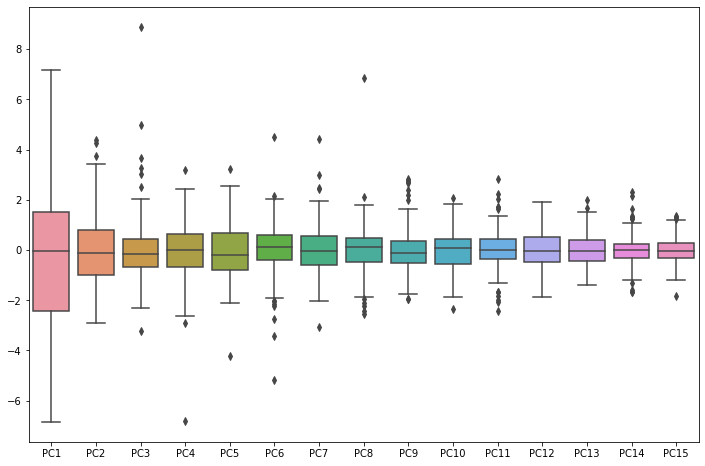

In [18]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4],
                       'PC6':pc[5],'PC7':pc[6],'PC8':pc[7],'PC9':pc[8],'PC10':pc[9],
                       'PC11':pc[10],'PC12':pc[11],'PC13':pc[12],'PC14':pc[13],'PC15':pc[14]
                       })
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=pcs_df2)
plt.show()

In [77]:
#pcs_df2.shape
pcs_df2.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.548750 -2.187999  0.206343 -1.083711 -0.646908  1.299994  0.696222   
1 -1.655453  1.968494 -1.585923 -0.668051 -0.287545  0.649187  0.764253   
2  0.705237 -0.411483 -0.324175  0.787062 -0.647212 -1.206142 -0.428925   
3 -1.509616  0.874340 -1.306675  0.548626  0.288414 -1.860717  0.129606   
4 -2.352911 -0.078479  0.370259 -0.051393  0.194008  0.128666 -0.318032   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.181474  1.523558  0.119751  0.511996  0.625334 -0.232743 -1.679693   
1 -0.637454  0.103073  1.116704  0.072711 -0.491380  0.185252  0.023869   
2 -0.912126 -0.547117  0.240936 -0.605383  1.077601  0.245825  0.499810   
3 -0.774157  0.791225 -0.842555 -0.916988 -0.485487  1.240353 -0.824778   
4  0.060678  1.234727  1.438910  0.755961 -1.090461 -0.812253  2.296527   

       PC15  
0  1.299986  
1  0.969617  
2 -0.339018  
3 -0.109017  
4  0.378547

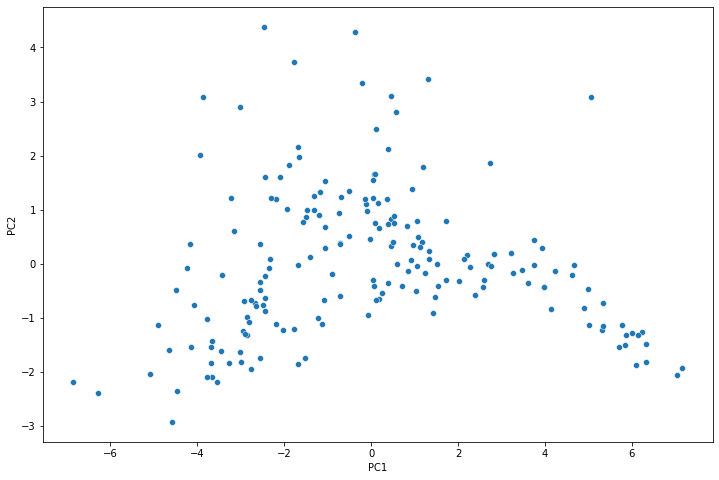

In [19]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)
plt.show()

## Clustering Process
### Hopkins statistic

In [20]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [21]:
hopkins(pcs_df2)

0.7804536433963595

### kmeans clustering 

In [122]:
# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(data_sc, axis=0)
cov_mat = np.cov(data_sc.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [123]:
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

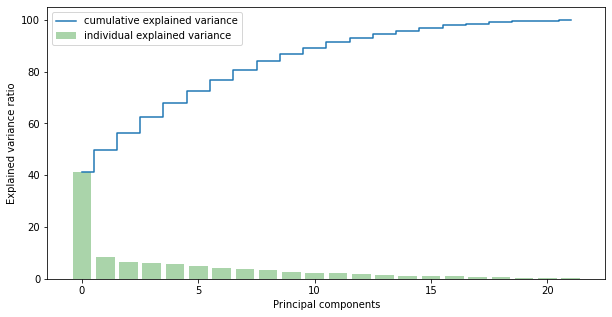

In [124]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

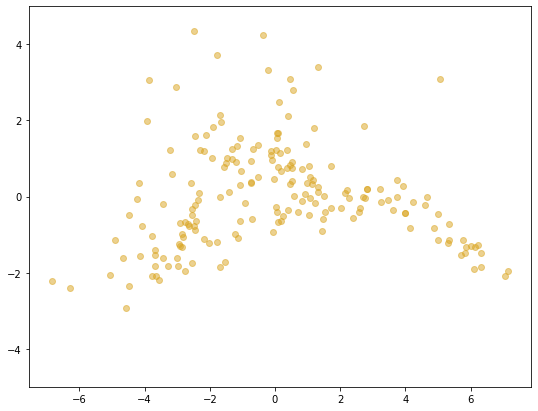

In [26]:
pca = PCA(n_components=15)
x_9d = pca.fit_transform(data_sc)
plt.figure(figsize = (9,7))
plt.scatter(x_9d[:,0],x_9d[:,1], c='goldenrod',alpha=0.5)
plt.ylim(-5,5)
plt.show()

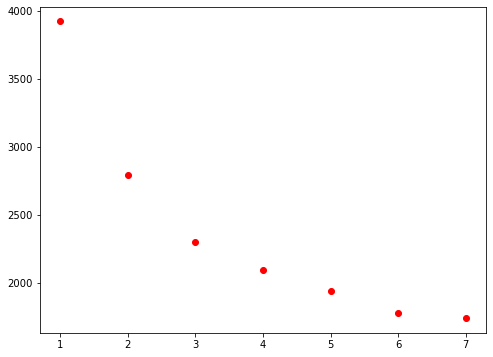

In [131]:
# K-Means Clustering:
cl = 7
corte = 0.1

anterior = 100000000000000
cost = [] 
K_best = cl

for k in range (1, cl+1):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    model = KMeans(
        n_clusters=k, 
        init='k-means++', #'random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101)

    model = model.fit(x_9d)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = model.labels_
 
    # Sum of distances of samples to their closest cluster center
    interia = model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte): K_best = k - 1
    cost.append(interia)
    anterior = interia

plt.figure(figsize=(8, 6))
plt.scatter(range (1, cl+1), cost, c='red')
plt.show()

In [145]:
features = data_sc.columns
for i in range(3,K_best+1,2):
    print("for {} clusters the silhouette score is {:1.2f}".format(i, cluster_centers[i]['silhouette_score']))
    print("Centers of each cluster:")
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=features))
    print('-'*50)

for 3 clusters the silhouette score is 0.21
Centers of each cluster:
   Life Expectancy  Cigarette consumption  Alcohol consumption  \
0     1.200284e+35           1.055732e+09         23759.791543   
1     6.338671e+27           6.394306e+05            57.580463   
2     2.417759e+32           1.845127e+09           179.170382   

   Incidence of tuberculosis per 100000 per year  \
0                                   3.402157e+04   
1                                  2.869516e+108   
2                                   9.638254e+20   

   GDP per Capita (Current US$)  Income Gini Coefficient  \
0                           inf                 1.364967   
1                           inf                 1.470447   
2                           inf                 1.438920   

   Current health expenditure per capita (current US$)  Total Population  \
0                                                inf                 inf   
1                                       6.990386e+45            

In [31]:
kmean= KMeans(3)
kmean.fit(x_9d)
labels=kmean.labels_

In [35]:
clusters=pd.concat([total_df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

Life Expectancy  Cigarette consumption  Alcohol consumption  \
0        58.095000                  20.30                5.774   
1        73.651000                  25.90                0.190   
2        72.947518                  11.60                7.230   
3        68.002000                  33.58                2.510   
4        72.453000                  14.90                4.160   

   Incidence of tuberculosis per 100000 per year  \
0                                          232.0   
1                                           19.0   
2                                           47.0   
3                                           75.0   
4                                          523.0   

   GDP per Capita (Current US$)  Income Gini Coefficient  \
0                  15015.799649                   0.4410   
1                  18003.981269                   0.3680   
2                   7559.975039                   0.3682   
3                   3476.650895                   0.3682   
4                  13056.884580                   0.3908   

   Current health expenditure per capita (current US$)  Total Population  \
0                                          22.638190          11381377.0   
1                                        1237.870196          18275704.0   
2                                         440.169860             72172.0   
3                                         415.198270            116255.0   
4                                        1122.642322          25887045.0   

   Population Density, Number of People/km2  \
0                                     18.01   
1                                     99.52   
2                                     96.23   
3                                    166.08   
4                                    214.99   

   Ambient Air Pollution, Concentration of Fine Particulate Matter PM2.5 (Ug/M3)  \
0                                              45.58                               
1                                              43.76                               
2                                              19.49                               
3                                              11.28                               
4                                              32.01                               

   ...  EPI score  cardiovascular-disease-death-rates  \
0  ...      41.14                          231.546557   
1  ...      44.02                          491.127714   
2  ...      51.20                          267.111202   
3  ...      37.40                          560.229290   
4  ...      38.50                          352.910430   

   Diabetes prevalence (% of population ages 20 to 79)  \
0                                                6.5     
1                                               14.9     
2                                               11.7     
3                                               15.6     
4                                                8.6     

   Acute lower respiratory infections  asthma-prevalence  Democracy Index  \
0                                19.0           4.048206            4.412   
1                                 1.8           3.444039            1.430   
2                                 1.4           7.177538            6.650   
3                                 4.9           3.265197            6.650   
4                                 2.9           3.914215            1.080   

   Human Development Index, 2019  Corruption Perceptions Index 2021  \
0                         0.4330                               11.0   
1                         0.5670                               13.0   
2                         0.7420                               55.0   
3                         0.6200                               51.8   
4                         0.5796                               16.0   

   UHC service coverage index  cluster  
0                        32.0        2  
1                      

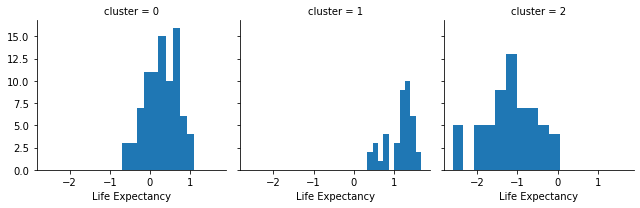

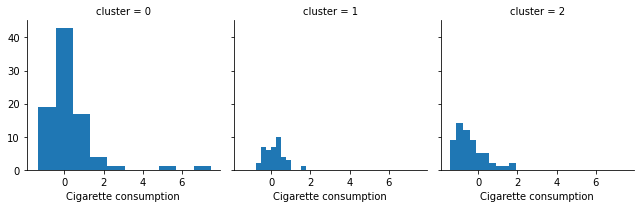

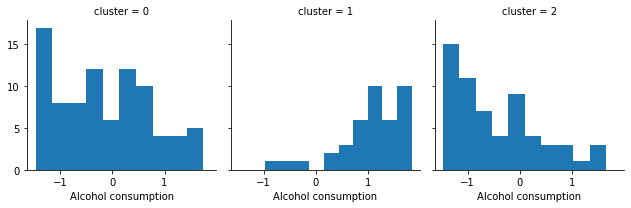

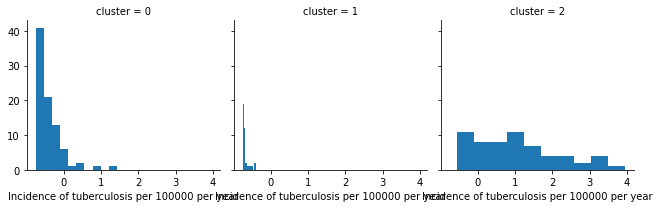

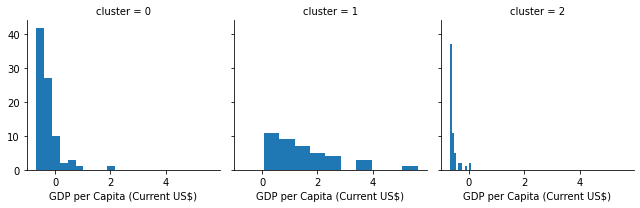

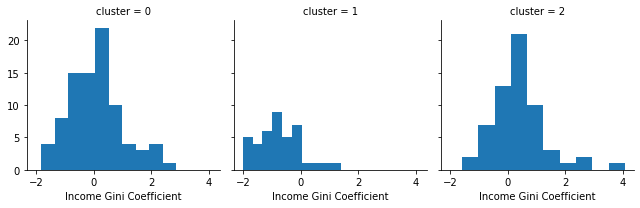

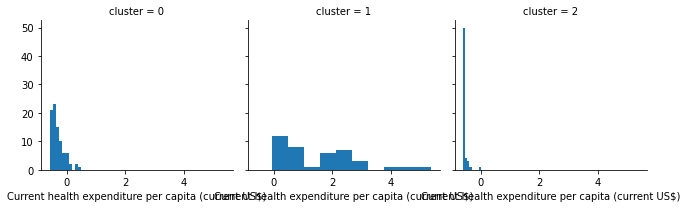

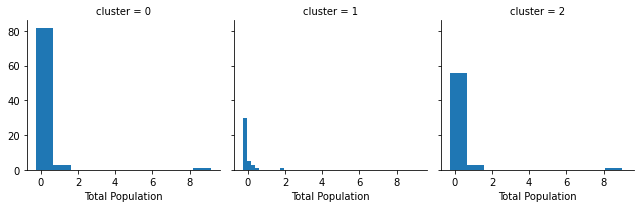

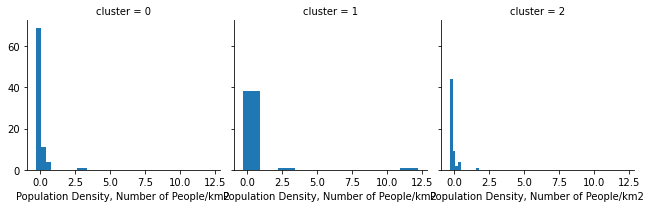

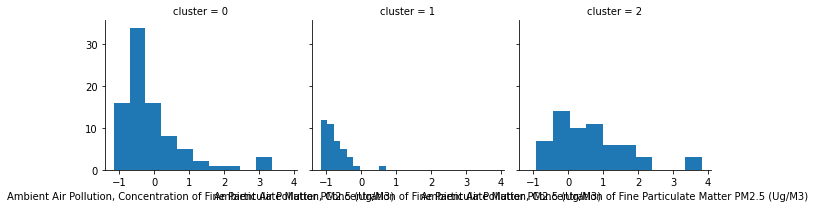

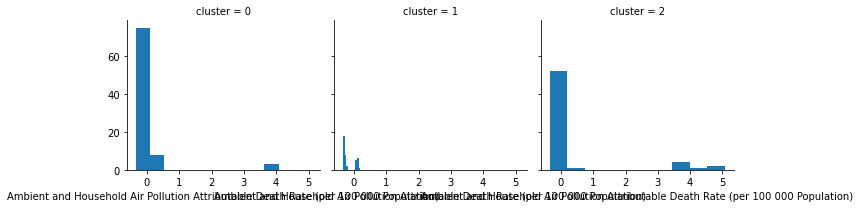

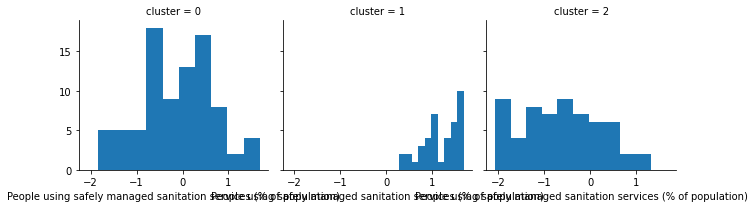

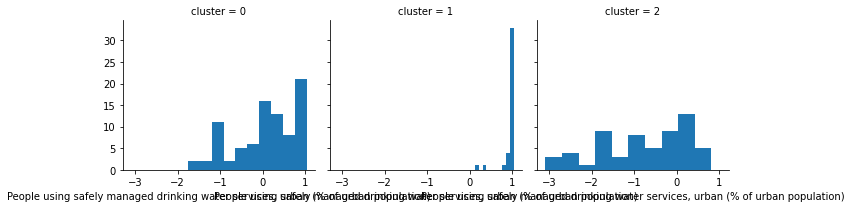

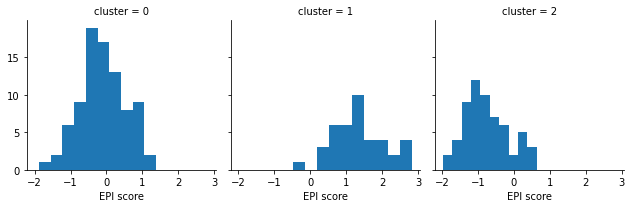

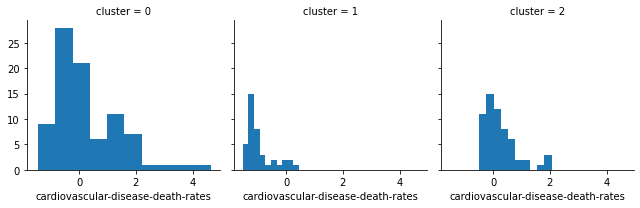

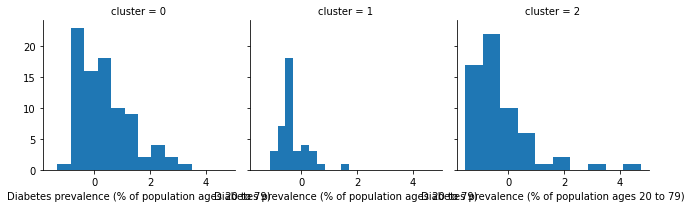

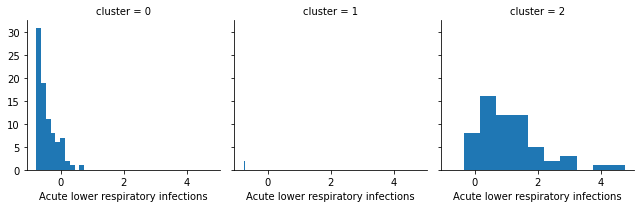

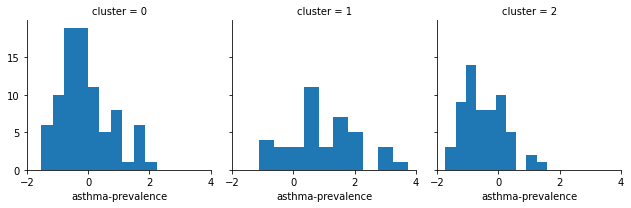

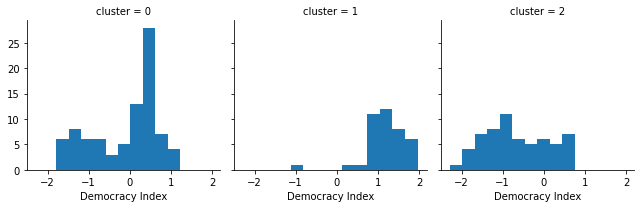

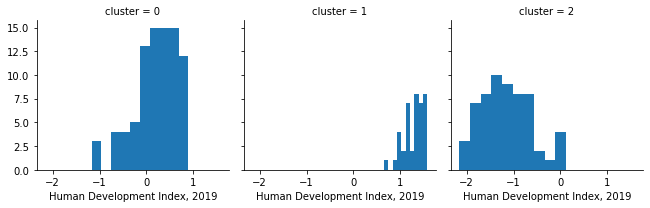

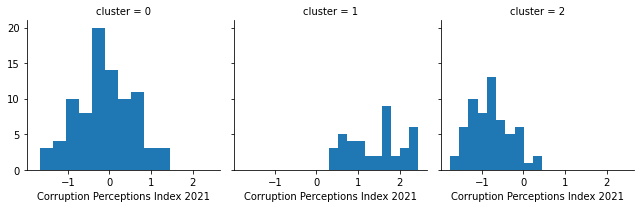

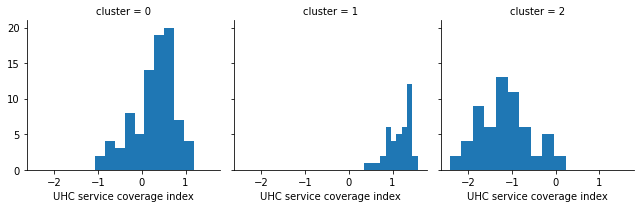

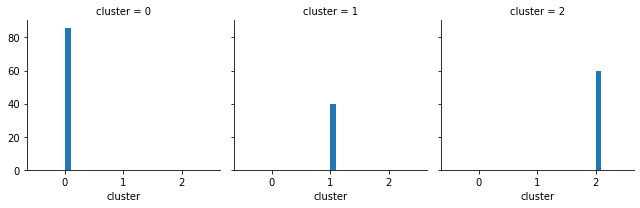

In [33]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

In [36]:
clusters.groupby('cluster').mean()

Life Expectancy  Cigarette consumption  Alcohol consumption  \
cluster                                                                
0              74.565564              21.335814             5.188337   
1              80.773037              20.777500            10.075750   
2              64.016467              13.368333             4.053183   

         Incidence of tuberculosis per 100000 per year  \
cluster                                                  
0                                            48.317442   
1                                            10.434750   
2                                           249.733333   

         GDP per Capita (Current US$)  Income Gini Coefficient  \
cluster                                                          
0                         9359.410503                 0.363893   
1                        46530.480021                 0.311130   
2                         2763.637956                 0.385567   

         Current health expenditure per capita (current US$)  \
cluster                                                        
0                                               534.139264     
1                                              3826.263605     
2                                               105.560865     

         Total Population  Population Density, Number of People/km2  \
cluster                                                               
0            3.908641e+07                                172.428023   
1            2.806543e+07                                367.615750   
2            5.551709e+07                                129.947500   

         Ambient Air Pollution, Concentration of Fine Particulate Matter PM2.5 (Ug/M3)  \
cluster                                                                                  
0                                                26.178837                               
1                                                13.275500                               
2                                                39.595500                               

         ...  \
cluster  ...   
0        ...   
1        ...   
2        ...   

         People using safely managed drinking water services, urban (% of urban population)  \
cluster                                                                                       
0                                                79.259349                                    
1                                                98.539700                                    
2                                                61.877600                                    

         EPI score  cardiovascular-disease-death-rates  \
cluster                                                  
0        41.964419                          329.142069   
1        59.747500                          161.740294   
2        33.881000                          326.916539   

         Diabetes prevalence (% of population ages 20 to 79)  \
cluster                                                        
0                                                10.118605     
1                                                 6.875000     
2                                                 6.933333     

         Acute lower respiratory infections  asthma-prevalence  \
cluster                                                          
0                                  1.819767           4.121528   
1                                  0.155000           6.082028   
2                                  9.818333           3.409192   

         Democracy Index  Human Development Index, 2019  \
cluster                                                   
0               5.214465                       0.750733   
1               7.988250                       0.910400   
2               3.898133                       0.544797   

         Corruption Perceptions Index 2021  UHC service coverage index  
cluster                      

AttributeError: 'PairGrid' object has no attribute 'get_figure'

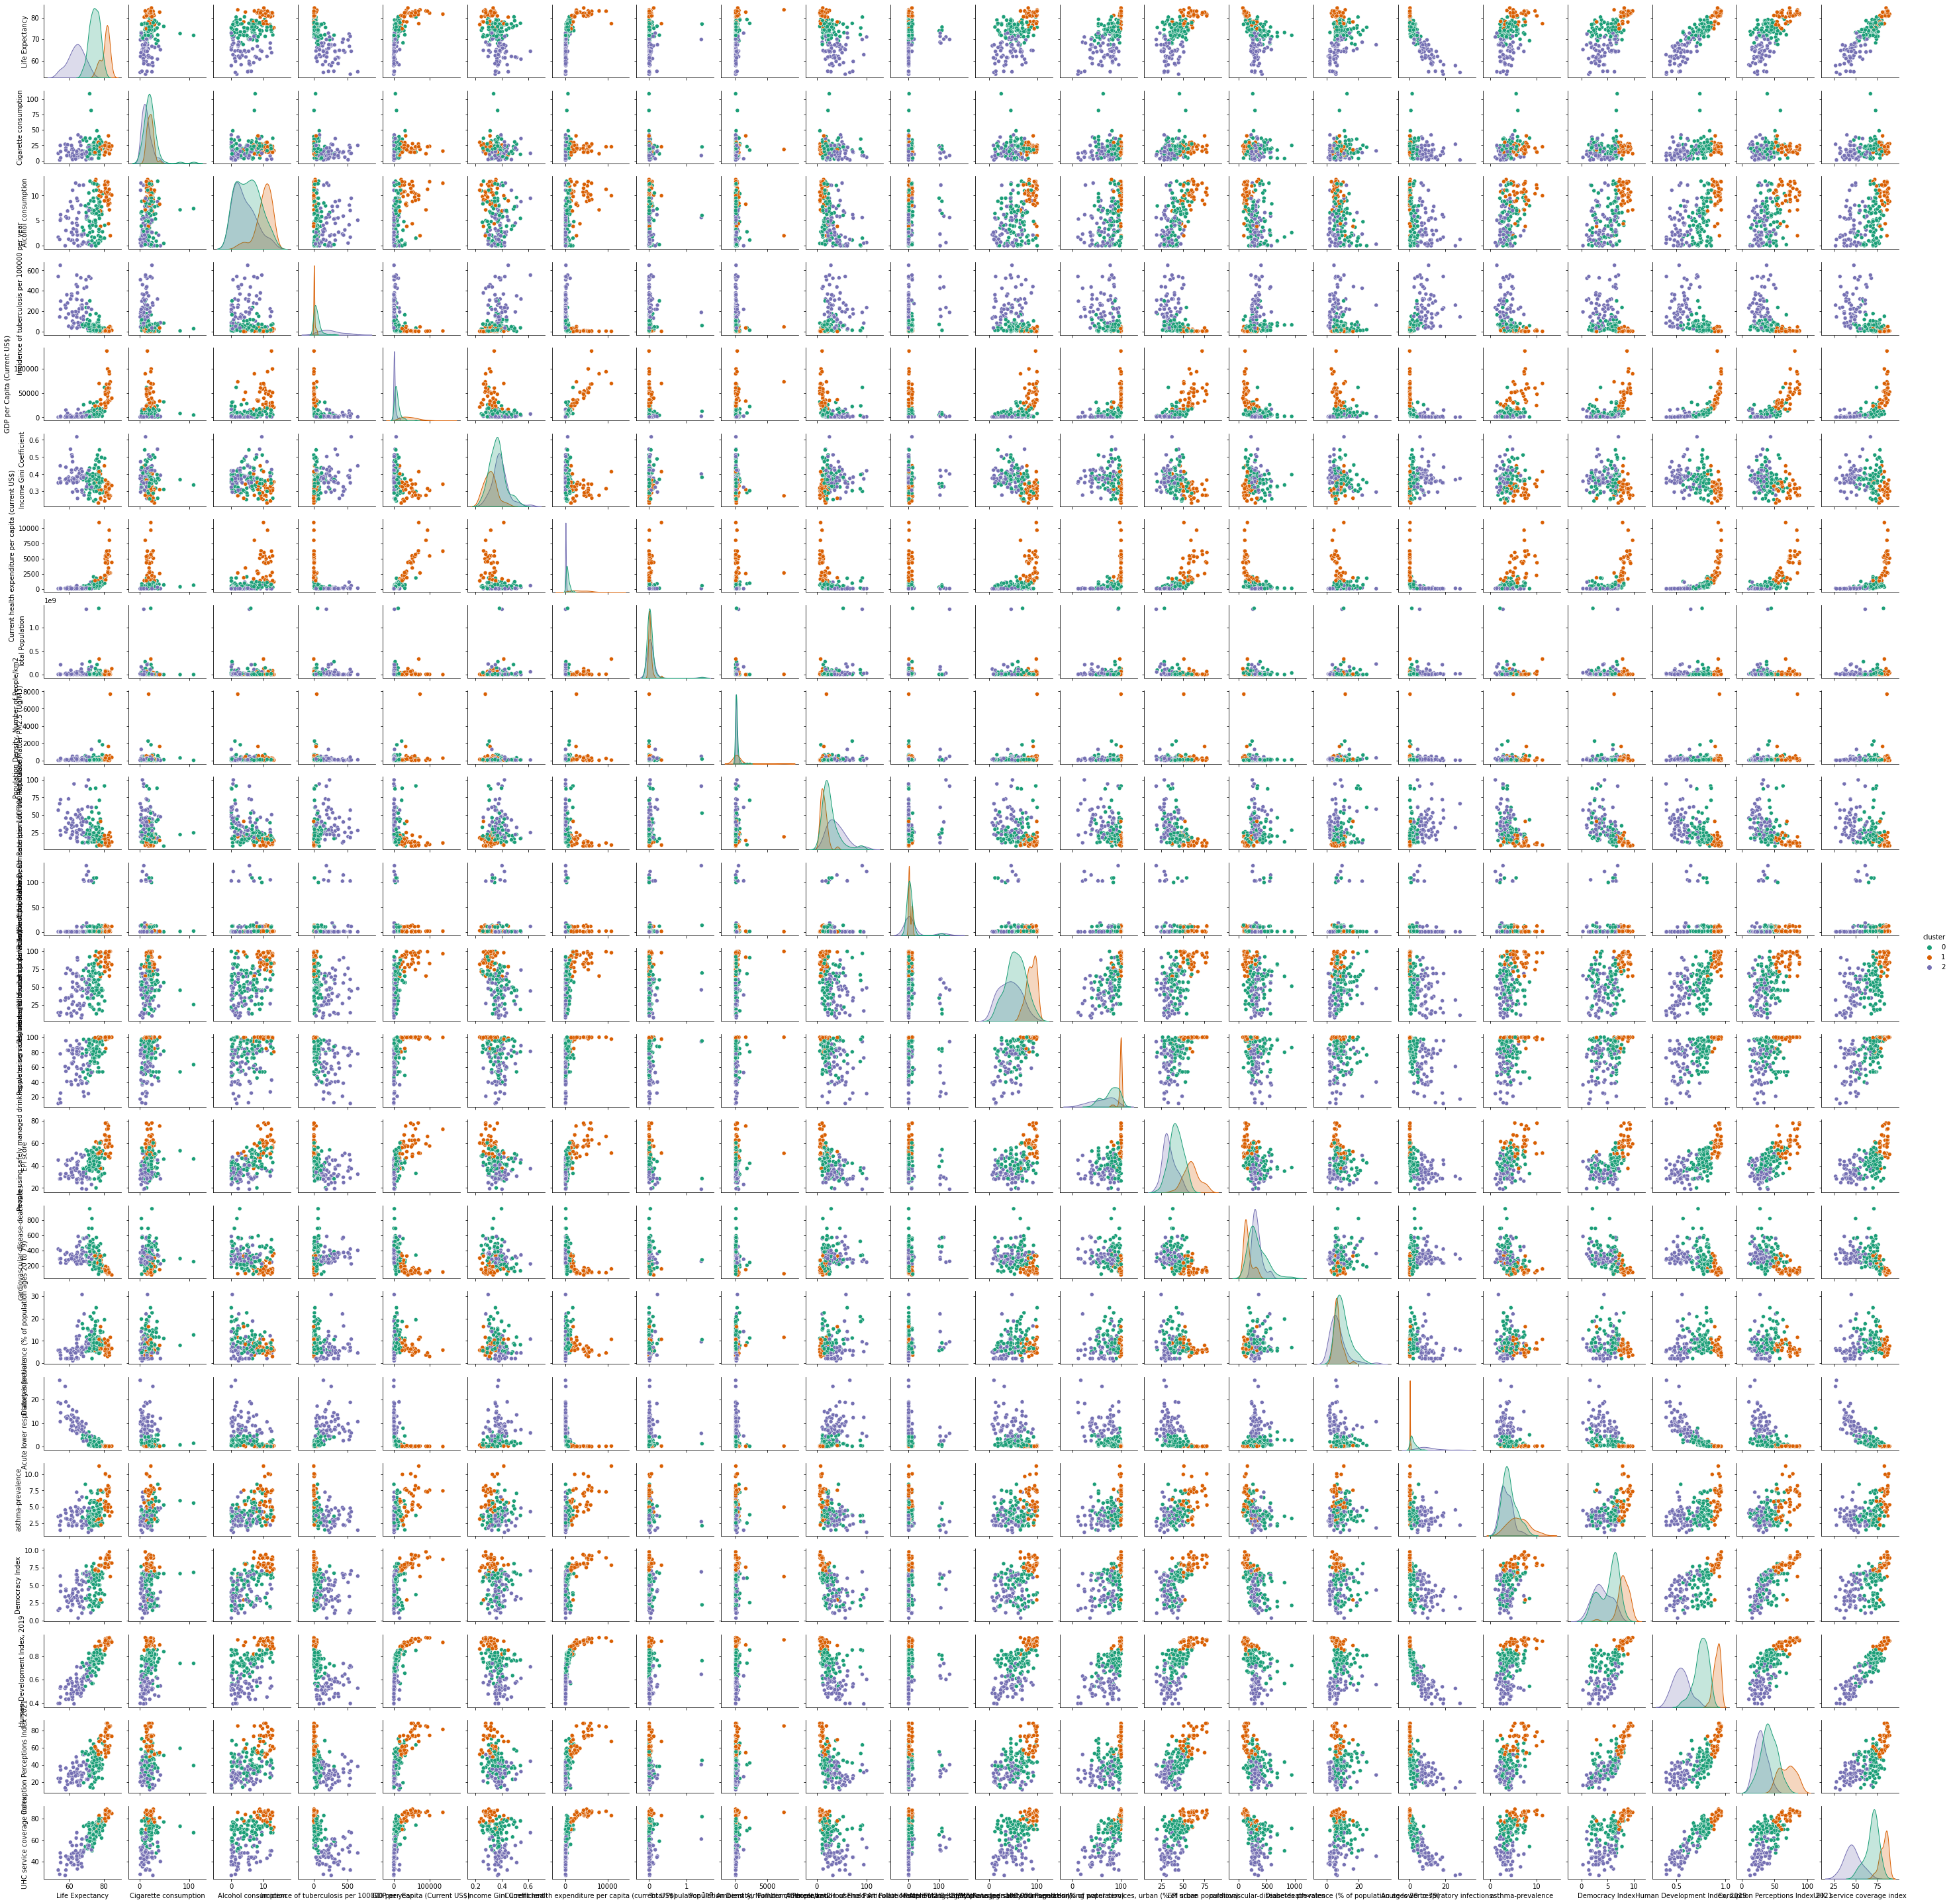

In [39]:
# Call Seaborn's pairplot to visualize our KMeans clustering on the PCA projected data

clustered_pairplot = sns.pairplot(clusters, hue='cluster', palette= 'Dark2', diag_kind='kde',size=1.85)
fig = clustered_pairplot.get_figure()
fig.savefig("clustered_pairplot_out.png") 

In [40]:
clustered_pairplot.figure.savefig("clustered_pairplot_out.png")

In [ ]:
# Joint Plots
# swarm plots

<AxesSubplot:xlabel='cluster', ylabel='Life Expectancy'>

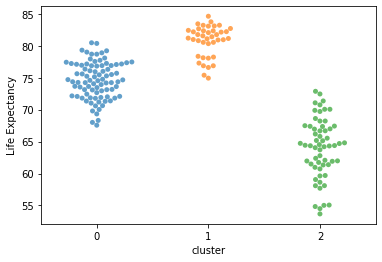

In [43]:
sns.swarmplot(x = "cluster", y = "Life Expectancy", data = clusters, alpha = 0.7)

In [ ]:
sns.jointplot(x = "cluster", y = "Life Expectancy", data = clusters, alpha = 0.7)

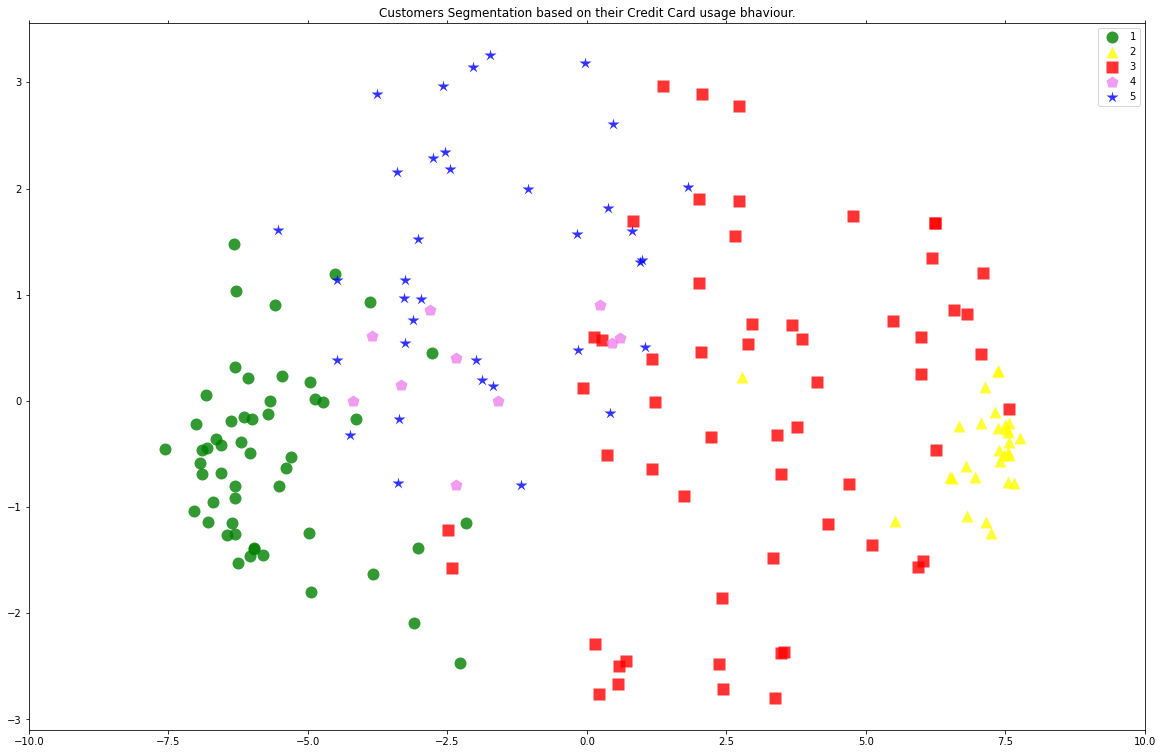

In [174]:
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(data_sc)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

x, y = X_PCA[:, 0], X_PCA[:, 1]
# x, y = x_9d[:,0],x_9d[:,1]

colors = {0: 'green',
          1: 'yellow',
          2: 'red',
         3: 'violet',
         4: 'blue'}

names = {0: '1', 
         1: '2', 
         2: '3',
        3: '4',
        4: '5'}
markers = {
    0: 'o', 
         1: '^', 
         2: 's',
        3: 'p',
        4: '*'
}

df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker= markers[name], linestyle='', ms=12, alpha=0.8,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')

ax.set_xlim(xmin = -10, xmax = 10)  
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

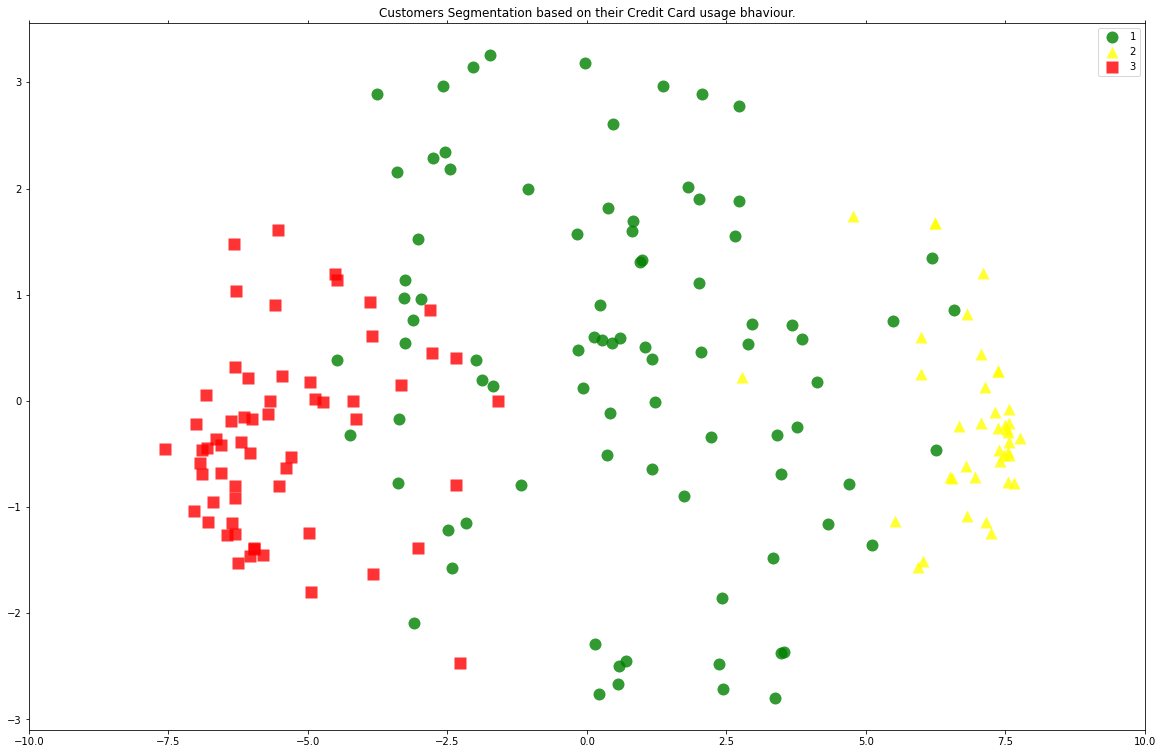

In [37]:
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(data_sc)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

x, y = X_PCA[:, 0], X_PCA[:, 1]
# x, y = x_9d[:,0],x_9d[:,1]

colors = {0: 'green',
          1: 'yellow',
          2: 'red'}

names = {0: '1', 
         1: '2', 
         2: '3'}
markers = {
    0: 'o', 
         1: '^', 
         2: 's'
}

df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker= markers[name], linestyle='', ms=12, alpha=0.8,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')

ax.set_xlim(xmin = -10, xmax = 10)  
ax.legend()
ax.set_title("Country Segmentation based on their characteristics")
plt.show()

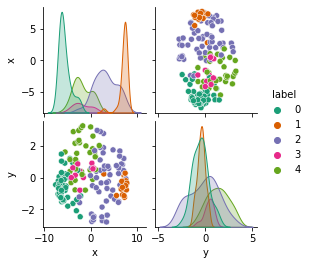

In [176]:
# Call Seaborn's pairplot to visualize our KMeans clustering on the PCA projected data

sns.pairplot(df, hue='label', palette= 'Dark2', diag_kind='kde',size=1.85)

### alternative kmeans

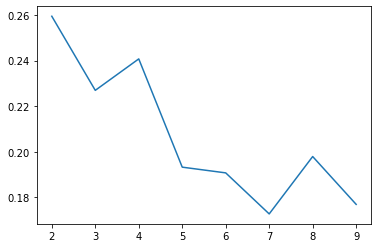

In [139]:
dat3_1 = pcs_df2
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])
    
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.show()

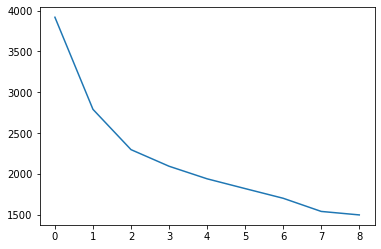

In [138]:
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
plt.show()

In [137]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dat3_1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(dat3_1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.2860575302713101
For n_clusters=3, the silhouette score is 0.22693349378595143
For n_clusters=4, the silhouette score is 0.23822856640437048
For n_clusters=5, the silhouette score is 0.25168054209507035
For n_clusters=6, the silhouette score is 0.19400263161765227
For n_clusters=7, the silhouette score is 0.2046212101625667
For n_clusters=8, the silhouette score is 0.17511913992970846


In [140]:
model_clus2 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
model_clus2.fit(dat3_1)

KMeans(max_iter=50, n_clusters=3, random_state=50)

In [87]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6', 'PC7','PC8','PC9','PC10',
                  'PC11', 'PC12','PC13','PC14','PC15', 'ClusterID']
dat_km

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -3.548750 -2.187999  0.206343 -1.083711 -0.646908  1.299994  0.696222   
1   -1.655453  1.968494 -1.585923 -0.668051 -0.287545  0.649187  0.764253   
2    0.705237 -0.411483 -0.324175  0.787062 -0.647212 -1.206142 -0.428925   
3   -1.509616  0.874340 -1.306675  0.548626  0.288414 -1.860717  0.129606   
4   -2.352911 -0.078479  0.370259 -0.051393  0.194008  0.128666 -0.318032   
..        ...       ...       ...       ...       ...       ...       ...   
181 -4.656687 -1.593936  1.497115 -0.928861 -0.877140 -0.128786  1.959454   
182  0.032935  1.212971  1.035784  2.021207  2.189175 -1.900337  0.607688   
183  0.103872 -0.671214 -0.581400  1.360422 -0.835512  0.233519 -0.544706   
184  1.731937 -0.302141 -0.351867  0.428811  1.499624  0.535152 -0.159581   
185 -3.668930 -1.416847 -0.585437  0.631414 -1.129423 -0.433223  0.863186   

          PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0   -0.181474  1.523558  0.119751  0.511996  0.625334 -0.232743 -1.679693   
1   -0.637454  0.103073  1.116704  0.072711 -0.491380  0.185252  0.023869   
2   -0.912126 -0.547117  0.240936 -0.605383  1.077601  0.245825  0.499810   
3   -0.774157  0.791225 -0.842555 -0.916988 -0.485487  1.240353 -0.824778   
4    0.060678  1.234727  1.438910  0.755961 -1.090461 -0.812253  2.296527   
..        ...       ...       ...       ...       ...       ...       ...   
181  0.339384 -0.581362 -0.806967  0.087107  1.006564  0.353847  0.279748   
182  0.638203 -1.217574  2.085497 -1.034872 -0.436236 -0.314878 -1.036886   
183  0.120657  0.255001  0.276042 -0.127340  0.448991 -0.439755 -0.250196   
184  0.345934  0.571389  0.285411  0.030334  0.863717  0.506273 -0.183830   
185  0.948338 -1.225861  0.021513 -0.418311 -0.357333  0.542079 -0.105942   

         PC15  ClusterID  
0    1.299986          1  
1    0.969617          2  
2   -0.339018          2  
3   -0.109017          2  
4    0.378547          1  
..        ...        ...  
181 -0.525092          1  
182  1.243822          2  
183 -0.155396          2  
184  0.206965          2  
185 -0.190892          1  

[186 rows x 16 columns]

In [88]:
dat_km['ClusterID'].value_counts()

2    86
1    60
0    40
Name: ClusterID, dtype: int64

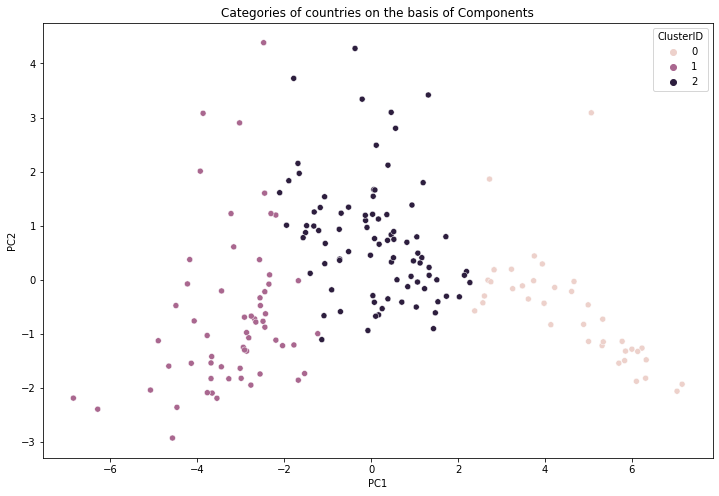

In [89]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

plt.title('Categories of countries on the basis of Components')
plt.show()

In [90]:
dat5=pd.merge(data_sc,dat_km, left_index=True,right_index=True)
dat5.head()

Life Expectancy  Cigarette consumption  Alcohol consumption  \
0        -1.998050               0.137189            -0.024774   
1         0.160014               0.601561            -1.419104   
2         0.062421              -0.584245             0.338790   
3        -0.623664               1.238413            -0.839798   
4        -0.006183              -0.310597            -0.427791   

   Incidence of tuberculosis per 100000 per year  \
0                                       0.917917   
1                                      -0.623323   
2                                      -0.420719   
3                                      -0.218114   
4                                       3.023556   

   GDP per Capita (Current US$)  Income Gini Coefficient  \
0                     -0.009807                 1.281863   
1                      0.129922                 0.133161   
2                     -0.358445                 0.136308   
3                     -0.549384                 0.136308   
4                     -0.101407                 0.491933   

   Current health expenditure per capita (current US$)  Total Population  \
0                                          -0.593344           -0.204484   
1                                           0.073534           -0.158466   
2                                          -0.364217           -0.279971   
3                                          -0.377921           -0.279677   
4                                           0.010301           -0.107662   

   Population Density, Number of People/km2  \
0                                 -0.296944   
1                                 -0.164458   
2                                 -0.169806   
3                                 -0.056272   
4                                  0.023226   

   Ambient Air Pollution, Concentration of Fine Particulate Matter PM2.5 (Ug/M3)  \
0                                           0.946956                               
1                                           0.850394                               
2                                          -0.437284                               
3                                          -0.872877                               
4                                           0.226981                               

   ...       PC7       PC8       PC9      PC10      PC11      PC12      PC13  \
0  ...  0.696222 -0.181474  1.523558  0.119751  0.511996  0.625334 -0.232743   
1  ...  0.764253 -0.637454  0.103073  1.116704  0.072711 -0.491380  0.185252   
2  ... -0.428925 -0.912126 -0.547117  0.240936 -0.605383  1.077601  0.245825   
3  ...  0.129606 -0.774157  0.791225 -0.842555 -0.916988 -0.485487  1.240353   
4  ... -0.318032  0.060678  1.234727  1.438910  0.755961 -1.090461 -0.812253   

       PC14      PC15  ClusterID  
0 -1.679693  1.299986          1  
1  0.023869  0.969617          2  
2  0.499810 -0.339018          2  
3 -0.824778 -0.109017          2  
4  2.296527  0.378547          1  

[5 rows x 38 columns]

In [91]:
dat6=dat5.drop(['PC1', 'PC2','PC3','PC4','PC5','PC6', 'PC7','PC8','PC9','PC10', 'PC11', 'PC12','PC13','PC14','PC15'],axis=1)
dat6.head()

Life Expectancy  Cigarette consumption  Alcohol consumption  \
0        -1.998050               0.137189            -0.024774   
1         0.160014               0.601561            -1.419104   
2         0.062421              -0.584245             0.338790   
3        -0.623664               1.238413            -0.839798   
4        -0.006183              -0.310597            -0.427791   

   Incidence of tuberculosis per 100000 per year  \
0                                       0.917917   
1                                      -0.623323   
2                                      -0.420719   
3                                      -0.218114   
4                                       3.023556   

   GDP per Capita (Current US$)  Income Gini Coefficient  \
0                     -0.009807                 1.281863   
1                      0.129922                 0.133161   
2                     -0.358445                 0.136308   
3                     -0.549384                 0.136308   
4                     -0.101407                 0.491933   

   Current health expenditure per capita (current US$)  Total Population  \
0                                          -0.593344           -0.204484   
1                                           0.073534           -0.158466   
2                                          -0.364217           -0.279971   
3                                          -0.377921           -0.279677   
4                                           0.010301           -0.107662   

   Population Density, Number of People/km2  \
0                                 -0.296944   
1                                 -0.164458   
2                                 -0.169806   
3                                 -0.056272   
4                                  0.023226   

   Ambient Air Pollution, Concentration of Fine Particulate Matter PM2.5 (Ug/M3)  \
0                                           0.946956                               
1                                           0.850394                               
2                                          -0.437284                               
3                                          -0.872877                               
4                                           0.226981                               

   ...  EPI score  cardiovascular-disease-death-rates  \
0  ...  -0.165820                           -0.432706   
1  ...   0.068143                            1.412357   
2  ...   0.651427                           -0.179918   
3  ...  -0.469647                            1.903521   
4  ...  -0.380286                            0.429930   

   Diabetes prevalence (% of population ages 20 to 79)  \
0                                          -0.400830     
1                                           1.377298     
2                                           0.699916     
3                                           1.525475     
4                                           0.043702     

   Acute lower respiratory infections  asthma-prevalence  Democracy Index  \
0                            2.953801          -0.143113        -0.440254   
1                           -0.442720          -0.469208        -1.787646   
2                           -0.521709           1.545925         0.570968   
3                            0.169444          -0.565737         0.570968   
4                           -0.225500          -0.215433        -1.945790   

   Human Development Index, 2019  Corruption Perceptions Index 2021  \
0                      -1.899504                          -1.772494   
1                      -1.008401                          -1.663074   
2                       0.155353                           0.634756   
3                      -0.655950                           0.459684   
4                      -0.924610                          -1.498943   

   UHC service coverage index  ClusterID  
0                   -2.100902          1  
1                  

In [92]:
dat6.shape

(186, 23)

### Analysis of the clusters

In [118]:
# calculating the mean of all the variables of each clusters
df_clusters = pd.DataFrame()

for col in dat6.columns[:-1]:
    df_clusters = pd.concat([df_clusters, pd.DataFrame(dat6.groupby(["ClusterID"])[col].mean())],
                            axis=1)
    
df_clusters


Life Expectancy  Cigarette consumption  Alcohol consumption  \
ClusterID                                                                
0                 1.148045               0.176785             1.049377   
1                -1.176572              -0.437609            -0.454464   
2                 0.286890               0.223083            -0.171015   

           Incidence of tuberculosis per 100000 per year  \
ClusterID                                                  
0                                              -0.685300   
1                                               1.046234   
2                                              -0.411186   

           GDP per Capita (Current US$)  Income Gini Coefficient  \
ClusterID                                                          
0                              1.463837                -0.761725   
1                             -0.582724                 0.409584   
2                             -0.274303                 0.068535   

           Current health expenditure per capita (current US$)  \
ClusterID                                                        
0                                                   1.493956     
1                                                  -0.547839     
2                                                  -0.312650     

           Total Population  Population Density, Number of People/km2  \
ClusterID                                                               
0                 -0.093121                                  0.271303   
1                  0.090114                                 -0.115002   
2                 -0.019558                                 -0.045954   

           Ambient Air Pollution, Concentration of Fine Particulate Matter PM2.5 (Ug/M3)  \
ClusterID                                                                                  
0                                                  -0.767003                               
1                                                   0.629440                               
2                                                  -0.082399                               

           ...  \
ClusterID  ...   
0          ...   
1          ...   
2          ...   

           People using safely managed drinking water services, urban (% of urban population)  \
ClusterID                                                                                       
0                                                   0.967263                                    
1                                                  -0.742481                                    
2                                                   0.068120                                    

           EPI score  cardiovascular-disease-death-rates  \
ClusterID                                                  
0           1.345802                           -0.928878   
1          -0.755521                            0.245169   
2          -0.098847                            0.260988   

           Diabetes prevalence (% of population ages 20 to 79)  \
ClusterID                                                        
0                                                  -0.321449     
1                                                  -0.309101     
2                                                   0.365163     

           Acute lower respiratory infections  asthma-prevalence  \
ClusterID                                                          
0                                   -0.767561           0.954630   
1                                    1.140678          -0.488016   
2                                   -0.438816          -0.103538   

           Democracy Index  Human Development Index, 2019  \
ClusterID                                                   
0                 1.175645                       1.275217   
1                -0.672440                      -1.156053   
2                -0.077667                    

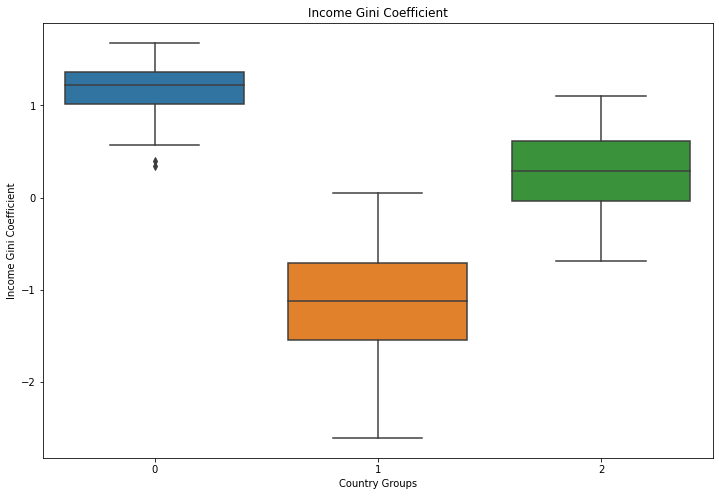

In [121]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(x='ClusterID',y='Life Expectancy',data=dat6)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('Income Gini Coefficient', fontsize=10)
plt.title('Income Gini Coefficient')
plt.show()

### just PCA

from the research

In [54]:
from sklearn.decomposition import PCA

n_components = 3
pca = PCA(n_components=n_components, iterated_power='auto', svd_solver='auto', whiten=True).fit(df)
pca_trans = pca.transform(df)

In [55]:
total_variance = np.cumsum(pca.explained_variance_ratio_)
total_variance[:5]

array([0.4125808 , 0.49725995, 0.56282103])

In [56]:
df_pca = pd.DataFrame(pca_trans)

In [57]:
from sklearn.metrics import pairwise_distances

def cost(data, k, centroids, clusters):
    cost = 0.0
    for c in range(k):
        points_cluster = data[clusters==c, :]
        if points_cluster.shape[0] > 0: 
            distances = pairwise_distances(points_cluster, [centroids[c]], metric='euclidean')
            cost += np.sum(distances**2)
    return cost/len(clusters)

C:\Users\Tetiana Matviichuk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1836: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


0,

C:\Users\Tetiana Matviichuk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1836: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


1,

C:\Users\Tetiana Matviichuk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1836: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


2,

C:\Users\Tetiana Matviichuk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1836: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


3,

C:\Users\Tetiana Matviichuk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1836: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


4,

C:\Users\Tetiana Matviichuk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1836: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


5,

C:\Users\Tetiana Matviichuk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1836: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


6,

C:\Users\Tetiana Matviichuk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1836: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


7,

C:\Users\Tetiana Matviichuk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1836: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


8,

C:\Users\Tetiana Matviichuk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1836: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


9,

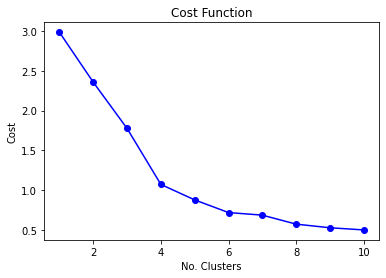

In [58]:
from sklearn.cluster import MiniBatchKMeans

# Arrat que guardará los costes
costsD = np.zeros(10,)
# Valores de k de 1 a 64
ks = 1+np.arange(10)
# Guarda los costes
#costs = np.zeros(20,)
# Valores de k de 5 a 125
#ks = np.linspace(1,20,20).astype(int)

# Ejecuta k-means para cada valor de k, y guarda el coste asociado
for i,k in enumerate(ks):
    kmeans = MiniBatchKMeans(n_clusters=k, init='k-means++', max_iter=500)    
    kmeans.fit(df_pca.values)
    centroidsD = kmeans.cluster_centers_
    clustersD = kmeans.labels_
    costsD[i] = cost(df_pca.values, k, centroidsD, clustersD)
    print(i,end=',')

plt.xlabel('No. Clusters')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.plot(ks,costsD, 'bo-'); 
plt.savefig('coste.eps', format='eps', dpi=400)

In [59]:
for i in range(10):
    print(costsD[i])

2.9856481716911256
2.3577577351873034
1.7764048473155176
1.0719493372437778
0.8772122411041814
0.7183190732822077
0.6855529334027769
0.5724856971906076
0.5269437807182074
0.49984138753834384


In [60]:
np.mean(costsD)

1.2072115204674052